In [1]:
import os, sys; sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

import util.RAVDESS_dataset_util as Rd
import multimodal_vae
from train_mvae import build_model, train

from config_args import ConfigModelArgs, ConfigTrainArgs

In [3]:
cfg_model = ConfigModelArgs()
cfg_train = ConfigTrainArgs()

In [4]:
face_dataset = Rd.FaceEmotionDataset(
    root_dir=cfg_model.dataset_path,
    transform=transforms.Compose
    ([
        Rd.Rescale(cfg_model.img_size), 
        Rd.CenterCrop(cfg_model.img_size), 
        Rd.ToTensor()
    ]))

trainingset_len = len(face_dataset) // 100 * 95
testset_len = len(face_dataset) - trainingset_len
training_dataset, testing_dataset = torch.utils.data.random_split(
    face_dataset, 
    [trainingset_len, testset_len],
    #generator=torch.Generator().manual_seed(42)
)

dataset_loader = DataLoader(training_dataset, batch_size=cfg_train.batch_size,
                        shuffle=True, num_workers=cfg_train.num_workers)

testset_loader = DataLoader(testing_dataset, batch_size=cfg_train.batch_size,
                        shuffle=True, num_workers=cfg_train.num_workers)

print('training set size: ',trainingset_len,'\ntest set size: ',testset_len)

training set size:  6840 
test set size:  360


In [5]:
model: torch.nn.Module = build_model(
    cat_dim=cfg_model.cat_dim,
    latent_space_dim=cfg_model.z_dim,
    hidden_dim=cfg_model.hidden_dim,
    num_channels=cfg_model.channel_dim,
    loss_weights=cfg_model.loss_weights,
    expert_type=cfg_model.expert_type,
    use_cuda=True
).double()

In [6]:
training_losses = train(
    mvae_model=model,
    dataset_loader=dataset_loader,
    learning_rate=cfg_train.learning_rate,
    optim_betas=cfg_train.optim_betas,
    num_epochs=cfg_train.num_epochs,
    batch_size=cfg_train.batch_size,
    checkpoint_every=cfg_train.checkpoint_every,
    checkpoint_path=cfg_train.checkpoint_path,
    save_model=cfg_train.save_model,
    seed=cfg_train.seed,
    use_cuda=cfg_train.use_cuda,
    cfg=cfg_train
)

  0%|▏                         | 1/200 [01:39<5:29:34, 99.37s/it]

Multimodal losses:
Mean total loss: 4.7395;
Mean reconstruction loss: 1.7029;
Mean kld_loss loss: 30.366;
Mean faces_reconstruction loss: 0.3529;
Mean emotions_reconstruction loss: 1.35;

Face losses:
Mean total loss: 1.6217;
Mean reconstruction loss: 0.3504;
Mean kld_loss loss: 12.713;
Mean faces_reconstruction loss: 0.3504;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 2.936;
Mean reconstruction loss: 1.1189;
Mean kld_loss loss: 18.171;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 1.1189;



  1%|▎                         | 2/200 [03:19<5:29:39, 99.90s/it]

Multimodal losses:
Mean total loss: 2.5681;
Mean reconstruction loss: 0.61434;
Mean kld_loss loss: 19.537;
Mean faces_reconstruction loss: 0.13081;
Mean emotions_reconstruction loss: 0.48353;

Face losses:
Mean total loss: 0.68939;
Mean reconstruction loss: 0.13053;
Mean kld_loss loss: 5.5886;
Mean faces_reconstruction loss: 0.13053;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.2143;
Mean reconstruction loss: 0.2271;
Mean kld_loss loss: 9.8719;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.2271;



  2%|▍                        | 3/200 [05:00<5:29:23, 100.32s/it]

Multimodal losses:
Mean total loss: 2.3559;
Mean reconstruction loss: 0.44156;
Mean kld_loss loss: 19.144;
Mean faces_reconstruction loss: 0.10429;
Mean emotions_reconstruction loss: 0.33727;

Face losses:
Mean total loss: 0.59109;
Mean reconstruction loss: 0.10416;
Mean kld_loss loss: 4.8693;
Mean faces_reconstruction loss: 0.10416;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0703;
Mean reconstruction loss: 0.15104;
Mean kld_loss loss: 9.1924;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.15104;



  2%|▌                         | 4/200 [06:39<5:26:29, 99.95s/it]

Multimodal losses:
Mean total loss: 2.2955;
Mean reconstruction loss: 0.39314;
Mean kld_loss loss: 19.023;
Mean faces_reconstruction loss: 0.088349;
Mean emotions_reconstruction loss: 0.30479;

Face losses:
Mean total loss: 0.53933;
Mean reconstruction loss: 0.088226;
Mean kld_loss loss: 4.5111;
Mean faces_reconstruction loss: 0.088226;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0303;
Mean reconstruction loss: 0.12853;
Mean kld_loss loss: 9.0175;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.12853;



  2%|▋                        | 5/200 [08:20<5:25:47, 100.24s/it]

Multimodal losses:
Mean total loss: 2.222;
Mean reconstruction loss: 0.32428;
Mean kld_loss loss: 18.978;
Mean faces_reconstruction loss: 0.054695;
Mean emotions_reconstruction loss: 0.26958;

Face losses:
Mean total loss: 0.4882;
Mean reconstruction loss: 0.054476;
Mean kld_loss loss: 4.3372;
Mean faces_reconstruction loss: 0.054476;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0314;
Mean reconstruction loss: 0.13343;
Mean kld_loss loss: 8.98;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.13343;



  3%|▊                        | 6/200 [10:00<5:24:10, 100.26s/it]

Multimodal losses:
Mean total loss: 2.2087;
Mean reconstruction loss: 0.31597;
Mean kld_loss loss: 18.927;
Mean faces_reconstruction loss: 0.047616;
Mean emotions_reconstruction loss: 0.26835;

Face losses:
Mean total loss: 0.46638;
Mean reconstruction loss: 0.047521;
Mean kld_loss loss: 4.1886;
Mean faces_reconstruction loss: 0.047521;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0089;
Mean reconstruction loss: 0.11394;
Mean kld_loss loss: 8.95;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11394;



  4%|▉                        | 7/200 [11:40<5:21:57, 100.09s/it]

Multimodal losses:
Mean total loss: 2.196;
Mean reconstruction loss: 0.30383;
Mean kld_loss loss: 18.922;
Mean faces_reconstruction loss: 0.04589;
Mean emotions_reconstruction loss: 0.25794;

Face losses:
Mean total loss: 0.45324;
Mean reconstruction loss: 0.045817;
Mean kld_loss loss: 4.0742;
Mean faces_reconstruction loss: 0.045817;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0085;
Mean reconstruction loss: 0.11424;
Mean kld_loss loss: 8.9423;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11424;



  4%|█                        | 8/200 [13:20<5:20:20, 100.10s/it]

Multimodal losses:
Mean total loss: 2.183;
Mean reconstruction loss: 0.30201;
Mean kld_loss loss: 18.81;
Mean faces_reconstruction loss: 0.044571;
Mean emotions_reconstruction loss: 0.25744;

Face losses:
Mean total loss: 0.44572;
Mean reconstruction loss: 0.044493;
Mean kld_loss loss: 4.0123;
Mean faces_reconstruction loss: 0.044493;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99237;
Mean reconstruction loss: 0.10886;
Mean kld_loss loss: 8.8351;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10886;



  4%|█▏                       | 9/200 [15:01<5:19:00, 100.21s/it]

Multimodal losses:
Mean total loss: 2.1802;
Mean reconstruction loss: 0.29496;
Mean kld_loss loss: 18.853;
Mean faces_reconstruction loss: 0.043172;
Mean emotions_reconstruction loss: 0.25179;

Face losses:
Mean total loss: 0.43913;
Mean reconstruction loss: 0.04309;
Mean kld_loss loss: 3.9604;
Mean faces_reconstruction loss: 0.04309;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.012;
Mean reconstruction loss: 0.11702;
Mean kld_loss loss: 8.9501;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11702;



  5%|█▏                      | 10/200 [16:41<5:17:23, 100.23s/it]

Multimodal losses:
Mean total loss: 2.1784;
Mean reconstruction loss: 0.29264;
Mean kld_loss loss: 18.857;
Mean faces_reconstruction loss: 0.03886;
Mean emotions_reconstruction loss: 0.25378;

Face losses:
Mean total loss: 0.42884;
Mean reconstruction loss: 0.038792;
Mean kld_loss loss: 3.9005;
Mean faces_reconstruction loss: 0.038792;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0018;
Mean reconstruction loss: 0.1083;
Mean kld_loss loss: 8.9354;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1083;



  6%|█▎                      | 11/200 [18:21<5:15:11, 100.06s/it]

Multimodal losses:
Mean total loss: 2.1649;
Mean reconstruction loss: 0.2873;
Mean kld_loss loss: 18.777;
Mean faces_reconstruction loss: 0.03836;
Mean emotions_reconstruction loss: 0.24893;

Face losses:
Mean total loss: 0.42432;
Mean reconstruction loss: 0.038319;
Mean kld_loss loss: 3.86;
Mean faces_reconstruction loss: 0.038319;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0042;
Mean reconstruction loss: 0.11242;
Mean kld_loss loss: 8.918;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11242;



  6%|█▌                       | 12/200 [20:00<5:13:08, 99.94s/it]

Multimodal losses:
Mean total loss: 2.1694;
Mean reconstruction loss: 0.29604;
Mean kld_loss loss: 18.733;
Mean faces_reconstruction loss: 0.038091;
Mean emotions_reconstruction loss: 0.25795;

Face losses:
Mean total loss: 0.41901;
Mean reconstruction loss: 0.038052;
Mean kld_loss loss: 3.8096;
Mean faces_reconstruction loss: 0.038052;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9965;
Mean reconstruction loss: 0.10494;
Mean kld_loss loss: 8.9156;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10494;



  6%|█▌                      | 13/200 [21:41<5:12:08, 100.15s/it]

Multimodal losses:
Mean total loss: 2.1699;
Mean reconstruction loss: 0.29785;
Mean kld_loss loss: 18.721;
Mean faces_reconstruction loss: 0.037628;
Mean emotions_reconstruction loss: 0.26022;

Face losses:
Mean total loss: 0.41641;
Mean reconstruction loss: 0.037604;
Mean kld_loss loss: 3.788;
Mean faces_reconstruction loss: 0.037604;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0009;
Mean reconstruction loss: 0.10789;
Mean kld_loss loss: 8.9301;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10789;



  7%|█▋                      | 14/200 [23:21<5:10:25, 100.14s/it]

Multimodal losses:
Mean total loss: 2.1663;
Mean reconstruction loss: 0.28828;
Mean kld_loss loss: 18.78;
Mean faces_reconstruction loss: 0.036851;
Mean emotions_reconstruction loss: 0.25143;

Face losses:
Mean total loss: 0.41292;
Mean reconstruction loss: 0.036836;
Mean kld_loss loss: 3.7609;
Mean faces_reconstruction loss: 0.036836;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0186;
Mean reconstruction loss: 0.1143;
Mean kld_loss loss: 9.0427;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1143;



  8%|█▉                       | 15/200 [25:01<5:08:16, 99.98s/it]

Multimodal losses:
Mean total loss: 2.1677;
Mean reconstruction loss: 0.30006;
Mean kld_loss loss: 18.676;
Mean faces_reconstruction loss: 0.036686;
Mean emotions_reconstruction loss: 0.26337;

Face losses:
Mean total loss: 0.40865;
Mean reconstruction loss: 0.03668;
Mean kld_loss loss: 3.7197;
Mean faces_reconstruction loss: 0.03668;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99731;
Mean reconstruction loss: 0.10207;
Mean kld_loss loss: 8.9524;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10207;



  8%|█▉                      | 16/200 [26:41<5:06:52, 100.07s/it]

Multimodal losses:
Mean total loss: 2.1313;
Mean reconstruction loss: 0.27265;
Mean kld_loss loss: 18.586;
Mean faces_reconstruction loss: 0.036608;
Mean emotions_reconstruction loss: 0.23604;

Face losses:
Mean total loss: 0.41133;
Mean reconstruction loss: 0.036616;
Mean kld_loss loss: 3.7471;
Mean faces_reconstruction loss: 0.036616;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0054;
Mean reconstruction loss: 0.11449;
Mean kld_loss loss: 8.9091;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11449;



  8%|██                      | 17/200 [28:21<5:05:11, 100.06s/it]

Multimodal losses:
Mean total loss: 2.1327;
Mean reconstruction loss: 0.27589;
Mean kld_loss loss: 18.568;
Mean faces_reconstruction loss: 0.036544;
Mean emotions_reconstruction loss: 0.23935;

Face losses:
Mean total loss: 0.40688;
Mean reconstruction loss: 0.036554;
Mean kld_loss loss: 3.7032;
Mean faces_reconstruction loss: 0.036554;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0012;
Mean reconstruction loss: 0.11681;
Mean kld_loss loss: 8.8435;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11681;



  9%|██▎                      | 18/200 [30:01<5:03:17, 99.99s/it]

Multimodal losses:
Mean total loss: 2.1453;
Mean reconstruction loss: 0.28981;
Mean kld_loss loss: 18.555;
Mean faces_reconstruction loss: 0.036367;
Mean emotions_reconstruction loss: 0.25344;

Face losses:
Mean total loss: 0.40363;
Mean reconstruction loss: 0.036388;
Mean kld_loss loss: 3.6724;
Mean faces_reconstruction loss: 0.036388;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0037;
Mean reconstruction loss: 0.10842;
Mean kld_loss loss: 8.9532;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10842;



 10%|██▎                     | 19/200 [31:41<5:02:09, 100.16s/it]

Multimodal losses:
Mean total loss: 2.1219;
Mean reconstruction loss: 0.27786;
Mean kld_loss loss: 18.44;
Mean faces_reconstruction loss: 0.036343;
Mean emotions_reconstruction loss: 0.24152;

Face losses:
Mean total loss: 0.40302;
Mean reconstruction loss: 0.036364;
Mean kld_loss loss: 3.6665;
Mean faces_reconstruction loss: 0.036364;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99961;
Mean reconstruction loss: 0.11632;
Mean kld_loss loss: 8.8329;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11632;



 10%|██▌                      | 20/200 [33:21<4:59:39, 99.89s/it]

Multimodal losses:
Mean total loss: 2.138;
Mean reconstruction loss: 0.29387;
Mean kld_loss loss: 18.441;
Mean faces_reconstruction loss: 0.036322;
Mean emotions_reconstruction loss: 0.25754;

Face losses:
Mean total loss: 0.39846;
Mean reconstruction loss: 0.036339;
Mean kld_loss loss: 3.6212;
Mean faces_reconstruction loss: 0.036339;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99206;
Mean reconstruction loss: 0.10724;
Mean kld_loss loss: 8.8482;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10724;



 10%|██▋                      | 21/200 [35:00<4:57:52, 99.85s/it]

Multimodal losses:
Mean total loss: 2.1334;
Mean reconstruction loss: 0.28475;
Mean kld_loss loss: 18.487;
Mean faces_reconstruction loss: 0.036243;
Mean emotions_reconstruction loss: 0.2485;

Face losses:
Mean total loss: 0.39833;
Mean reconstruction loss: 0.036276;
Mean kld_loss loss: 3.6206;
Mean faces_reconstruction loss: 0.036276;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0105;
Mean reconstruction loss: 0.11468;
Mean kld_loss loss: 8.9578;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11468;



 11%|██▊                      | 22/200 [36:40<4:55:57, 99.76s/it]

Multimodal losses:
Mean total loss: 2.1101;
Mean reconstruction loss: 0.27654;
Mean kld_loss loss: 18.335;
Mean faces_reconstruction loss: 0.036238;
Mean emotions_reconstruction loss: 0.2403;

Face losses:
Mean total loss: 0.39723;
Mean reconstruction loss: 0.036275;
Mean kld_loss loss: 3.6096;
Mean faces_reconstruction loss: 0.036275;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99763;
Mean reconstruction loss: 0.11075;
Mean kld_loss loss: 8.8688;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11075;



 12%|██▉                      | 23/200 [38:20<4:54:32, 99.84s/it]

Multimodal losses:
Mean total loss: 2.1173;
Mean reconstruction loss: 0.2838;
Mean kld_loss loss: 18.335;
Mean faces_reconstruction loss: 0.036226;
Mean emotions_reconstruction loss: 0.24757;

Face losses:
Mean total loss: 0.39461;
Mean reconstruction loss: 0.036268;
Mean kld_loss loss: 3.5834;
Mean faces_reconstruction loss: 0.036268;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99912;
Mean reconstruction loss: 0.1129;
Mean kld_loss loss: 8.8622;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1129;



 12%|██▉                     | 24/200 [40:01<4:53:32, 100.07s/it]

Multimodal losses:
Mean total loss: 2.1138;
Mean reconstruction loss: 0.28475;
Mean kld_loss loss: 18.29;
Mean faces_reconstruction loss: 0.036203;
Mean emotions_reconstruction loss: 0.24855;

Face losses:
Mean total loss: 0.39277;
Mean reconstruction loss: 0.036246;
Mean kld_loss loss: 3.5652;
Mean faces_reconstruction loss: 0.036246;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9923;
Mean reconstruction loss: 0.10681;
Mean kld_loss loss: 8.8548;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10681;



 12%|███                     | 25/200 [41:41<4:51:51, 100.06s/it]

Multimodal losses:
Mean total loss: 2.1193;
Mean reconstruction loss: 0.28476;
Mean kld_loss loss: 18.346;
Mean faces_reconstruction loss: 0.036156;
Mean emotions_reconstruction loss: 0.2486;

Face losses:
Mean total loss: 0.39206;
Mean reconstruction loss: 0.036214;
Mean kld_loss loss: 3.5585;
Mean faces_reconstruction loss: 0.036214;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99837;
Mean reconstruction loss: 0.10942;
Mean kld_loss loss: 8.8895;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10942;



 13%|███                     | 26/200 [43:21<4:50:11, 100.07s/it]

Multimodal losses:
Mean total loss: 2.1018;
Mean reconstruction loss: 0.27977;
Mean kld_loss loss: 18.22;
Mean faces_reconstruction loss: 0.036131;
Mean emotions_reconstruction loss: 0.24363;

Face losses:
Mean total loss: 0.39067;
Mean reconstruction loss: 0.036189;
Mean kld_loss loss: 3.5448;
Mean faces_reconstruction loss: 0.036189;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99057;
Mean reconstruction loss: 0.11297;
Mean kld_loss loss: 8.776;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11297;



 14%|███▏                    | 27/200 [45:01<4:48:27, 100.05s/it]

Multimodal losses:
Mean total loss: 2.1093;
Mean reconstruction loss: 0.2923;
Mean kld_loss loss: 18.17;
Mean faces_reconstruction loss: 0.036118;
Mean emotions_reconstruction loss: 0.25618;

Face losses:
Mean total loss: 0.38807;
Mean reconstruction loss: 0.036183;
Mean kld_loss loss: 3.5188;
Mean faces_reconstruction loss: 0.036183;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98427;
Mean reconstruction loss: 0.10679;
Mean kld_loss loss: 8.7748;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10679;



 14%|███▎                    | 28/200 [46:41<4:46:43, 100.02s/it]

Multimodal losses:
Mean total loss: 2.1076;
Mean reconstruction loss: 0.29091;
Mean kld_loss loss: 18.167;
Mean faces_reconstruction loss: 0.036108;
Mean emotions_reconstruction loss: 0.25481;

Face losses:
Mean total loss: 0.38807;
Mean reconstruction loss: 0.036168;
Mean kld_loss loss: 3.519;
Mean faces_reconstruction loss: 0.036168;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99116;
Mean reconstruction loss: 0.10758;
Mean kld_loss loss: 8.8358;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10758;



 14%|███▍                    | 29/200 [48:21<4:45:03, 100.02s/it]

Multimodal losses:
Mean total loss: 2.1156;
Mean reconstruction loss: 0.29289;
Mean kld_loss loss: 18.227;
Mean faces_reconstruction loss: 0.036085;
Mean emotions_reconstruction loss: 0.2568;

Face losses:
Mean total loss: 0.38615;
Mean reconstruction loss: 0.03615;
Mean kld_loss loss: 3.5;
Mean faces_reconstruction loss: 0.03615;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99407;
Mean reconstruction loss: 0.10524;
Mean kld_loss loss: 8.8883;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10524;



 15%|███▊                     | 30/200 [50:00<4:42:56, 99.86s/it]

Multimodal losses:
Mean total loss: 2.0905;
Mean reconstruction loss: 0.27909;
Mean kld_loss loss: 18.114;
Mean faces_reconstruction loss: 0.036075;
Mean emotions_reconstruction loss: 0.24301;

Face losses:
Mean total loss: 0.38418;
Mean reconstruction loss: 0.036157;
Mean kld_loss loss: 3.4802;
Mean faces_reconstruction loss: 0.036157;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98701;
Mean reconstruction loss: 0.10892;
Mean kld_loss loss: 8.7809;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10892;



 16%|███▉                     | 31/200 [51:40<4:41:07, 99.81s/it]

Multimodal losses:
Mean total loss: 2.0866;
Mean reconstruction loss: 0.28005;
Mean kld_loss loss: 18.066;
Mean faces_reconstruction loss: 0.03606;
Mean emotions_reconstruction loss: 0.24399;

Face losses:
Mean total loss: 0.38328;
Mean reconstruction loss: 0.036151;
Mean kld_loss loss: 3.4713;
Mean faces_reconstruction loss: 0.036151;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99085;
Mean reconstruction loss: 0.11311;
Mean kld_loss loss: 8.7774;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11311;



 16%|████                     | 32/200 [53:20<4:39:42, 99.89s/it]

Multimodal losses:
Mean total loss: 2.0962;
Mean reconstruction loss: 0.28958;
Mean kld_loss loss: 18.066;
Mean faces_reconstruction loss: 0.036059;
Mean emotions_reconstruction loss: 0.25352;

Face losses:
Mean total loss: 0.38349;
Mean reconstruction loss: 0.03614;
Mean kld_loss loss: 3.4735;
Mean faces_reconstruction loss: 0.03614;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99232;
Mean reconstruction loss: 0.11013;
Mean kld_loss loss: 8.8219;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11013;



 16%|████▏                    | 33/200 [55:00<4:37:46, 99.80s/it]

Multimodal losses:
Mean total loss: 2.0893;
Mean reconstruction loss: 0.28324;
Mean kld_loss loss: 18.061;
Mean faces_reconstruction loss: 0.03601;
Mean emotions_reconstruction loss: 0.24723;

Face losses:
Mean total loss: 0.38069;
Mean reconstruction loss: 0.036113;
Mean kld_loss loss: 3.4458;
Mean faces_reconstruction loss: 0.036113;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99565;
Mean reconstruction loss: 0.11647;
Mean kld_loss loss: 8.7918;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11647;



 17%|████▎                    | 34/200 [56:39<4:36:09, 99.82s/it]

Multimodal losses:
Mean total loss: 2.0842;
Mean reconstruction loss: 0.27888;
Mean kld_loss loss: 18.053;
Mean faces_reconstruction loss: 0.036009;
Mean emotions_reconstruction loss: 0.24287;

Face losses:
Mean total loss: 0.37962;
Mean reconstruction loss: 0.036112;
Mean kld_loss loss: 3.4351;
Mean faces_reconstruction loss: 0.036112;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 1.0004;
Mean reconstruction loss: 0.11891;
Mean kld_loss loss: 8.8147;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11891;



 18%|████▍                    | 35/200 [58:19<4:34:42, 99.89s/it]

Multimodal losses:
Mean total loss: 2.0974;
Mean reconstruction loss: 0.29749;
Mean kld_loss loss: 17.999;
Mean faces_reconstruction loss: 0.035992;
Mean emotions_reconstruction loss: 0.26149;

Face losses:
Mean total loss: 0.3766;
Mean reconstruction loss: 0.036104;
Mean kld_loss loss: 3.405;
Mean faces_reconstruction loss: 0.036104;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99098;
Mean reconstruction loss: 0.10899;
Mean kld_loss loss: 8.8199;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10899;



 18%|████▌                    | 36/200 [59:59<4:32:36, 99.74s/it]

Multimodal losses:
Mean total loss: 2.0723;
Mean reconstruction loss: 0.28038;
Mean kld_loss loss: 17.92;
Mean faces_reconstruction loss: 0.035986;
Mean emotions_reconstruction loss: 0.24439;

Face losses:
Mean total loss: 0.37686;
Mean reconstruction loss: 0.036106;
Mean kld_loss loss: 3.4076;
Mean faces_reconstruction loss: 0.036106;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98135;
Mean reconstruction loss: 0.10864;
Mean kld_loss loss: 8.7271;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10864;



 18%|████▎                  | 37/200 [1:01:39<4:30:55, 99.73s/it]

Multimodal losses:
Mean total loss: 2.0748;
Mean reconstruction loss: 0.28565;
Mean kld_loss loss: 17.892;
Mean faces_reconstruction loss: 0.035968;
Mean emotions_reconstruction loss: 0.24968;

Face losses:
Mean total loss: 0.37539;
Mean reconstruction loss: 0.036097;
Mean kld_loss loss: 3.3929;
Mean faces_reconstruction loss: 0.036097;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9796;
Mean reconstruction loss: 0.10719;
Mean kld_loss loss: 8.7241;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10719;



 19%|████▎                  | 38/200 [1:03:19<4:29:41, 99.89s/it]

Multimodal losses:
Mean total loss: 2.0647;
Mean reconstruction loss: 0.27783;
Mean kld_loss loss: 17.868;
Mean faces_reconstruction loss: 0.035936;
Mean emotions_reconstruction loss: 0.24189;

Face losses:
Mean total loss: 0.37638;
Mean reconstruction loss: 0.03608;
Mean kld_loss loss: 3.403;
Mean faces_reconstruction loss: 0.03608;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98488;
Mean reconstruction loss: 0.11075;
Mean kld_loss loss: 8.7413;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11075;



 20%|████▍                  | 39/200 [1:04:58<4:27:41, 99.76s/it]

Multimodal losses:
Mean total loss: 2.0642;
Mean reconstruction loss: 0.27909;
Mean kld_loss loss: 17.851;
Mean faces_reconstruction loss: 0.035945;
Mean emotions_reconstruction loss: 0.24314;

Face losses:
Mean total loss: 0.37468;
Mean reconstruction loss: 0.036075;
Mean kld_loss loss: 3.386;
Mean faces_reconstruction loss: 0.036075;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.982;
Mean reconstruction loss: 0.10538;
Mean kld_loss loss: 8.7662;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10538;



 20%|████▌                  | 40/200 [1:06:38<4:25:54, 99.72s/it]

Multimodal losses:
Mean total loss: 2.0836;
Mean reconstruction loss: 0.29313;
Mean kld_loss loss: 17.905;
Mean faces_reconstruction loss: 0.035929;
Mean emotions_reconstruction loss: 0.2572;

Face losses:
Mean total loss: 0.37275;
Mean reconstruction loss: 0.036069;
Mean kld_loss loss: 3.3668;
Mean faces_reconstruction loss: 0.036069;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98722;
Mean reconstruction loss: 0.10723;
Mean kld_loss loss: 8.7999;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10723;



 20%|████▋                  | 41/200 [1:08:18<4:24:24, 99.78s/it]

Multimodal losses:
Mean total loss: 2.076;
Mean reconstruction loss: 0.28471;
Mean kld_loss loss: 17.913;
Mean faces_reconstruction loss: 0.035929;
Mean emotions_reconstruction loss: 0.24878;

Face losses:
Mean total loss: 0.37163;
Mean reconstruction loss: 0.036076;
Mean kld_loss loss: 3.3555;
Mean faces_reconstruction loss: 0.036076;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98855;
Mean reconstruction loss: 0.10723;
Mean kld_loss loss: 8.8133;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10723;



 21%|████▊                  | 42/200 [1:09:57<4:22:37, 99.73s/it]

Multimodal losses:
Mean total loss: 2.0557;
Mean reconstruction loss: 0.27364;
Mean kld_loss loss: 17.821;
Mean faces_reconstruction loss: 0.035904;
Mean emotions_reconstruction loss: 0.23773;

Face losses:
Mean total loss: 0.37205;
Mean reconstruction loss: 0.036063;
Mean kld_loss loss: 3.3599;
Mean faces_reconstruction loss: 0.036063;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98251;
Mean reconstruction loss: 0.10772;
Mean kld_loss loss: 8.748;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10772;



 22%|████▉                  | 43/200 [1:11:37<4:21:03, 99.77s/it]

Multimodal losses:
Mean total loss: 2.0683;
Mean reconstruction loss: 0.28596;
Mean kld_loss loss: 17.823;
Mean faces_reconstruction loss: 0.035912;
Mean emotions_reconstruction loss: 0.25005;

Face losses:
Mean total loss: 0.36846;
Mean reconstruction loss: 0.036057;
Mean kld_loss loss: 3.324;
Mean faces_reconstruction loss: 0.036057;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98432;
Mean reconstruction loss: 0.10328;
Mean kld_loss loss: 8.8104;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10328;



 22%|█████                  | 44/200 [1:13:17<4:19:42, 99.88s/it]

Multimodal losses:
Mean total loss: 2.0661;
Mean reconstruction loss: 0.28602;
Mean kld_loss loss: 17.801;
Mean faces_reconstruction loss: 0.035881;
Mean emotions_reconstruction loss: 0.25014;

Face losses:
Mean total loss: 0.3701;
Mean reconstruction loss: 0.03604;
Mean kld_loss loss: 3.3407;
Mean faces_reconstruction loss: 0.03604;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98844;
Mean reconstruction loss: 0.11162;
Mean kld_loss loss: 8.7682;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11162;



 22%|█████▏                 | 45/200 [1:14:56<4:16:38, 99.34s/it]

Multimodal losses:
Mean total loss: 2.0551;
Mean reconstruction loss: 0.28031;
Mean kld_loss loss: 17.748;
Mean faces_reconstruction loss: 0.035877;
Mean emotions_reconstruction loss: 0.24443;

Face losses:
Mean total loss: 0.36939;
Mean reconstruction loss: 0.036042;
Mean kld_loss loss: 3.3335;
Mean faces_reconstruction loss: 0.036042;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98255;
Mean reconstruction loss: 0.10523;
Mean kld_loss loss: 8.7732;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10523;



 23%|█████▎                 | 46/200 [1:16:36<4:15:33, 99.57s/it]

Multimodal losses:
Mean total loss: 2.0586;
Mean reconstruction loss: 0.28484;
Mean kld_loss loss: 17.738;
Mean faces_reconstruction loss: 0.035856;
Mean emotions_reconstruction loss: 0.24898;

Face losses:
Mean total loss: 0.36765;
Mean reconstruction loss: 0.036035;
Mean kld_loss loss: 3.3162;
Mean faces_reconstruction loss: 0.036035;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97933;
Mean reconstruction loss: 0.10543;
Mean kld_loss loss: 8.739;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10543;



 24%|█████▍                 | 47/200 [1:18:16<4:14:10, 99.68s/it]

Multimodal losses:
Mean total loss: 2.0387;
Mean reconstruction loss: 0.27504;
Mean kld_loss loss: 17.637;
Mean faces_reconstruction loss: 0.035872;
Mean emotions_reconstruction loss: 0.23917;

Face losses:
Mean total loss: 0.3676;
Mean reconstruction loss: 0.036043;
Mean kld_loss loss: 3.3156;
Mean faces_reconstruction loss: 0.036043;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97323;
Mean reconstruction loss: 0.106;
Mean kld_loss loss: 8.6724;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.106;



 24%|█████▌                 | 48/200 [1:19:56<4:13:05, 99.91s/it]

Multimodal losses:
Mean total loss: 2.0451;
Mean reconstruction loss: 0.27892;
Mean kld_loss loss: 17.662;
Mean faces_reconstruction loss: 0.035857;
Mean emotions_reconstruction loss: 0.24307;

Face losses:
Mean total loss: 0.36592;
Mean reconstruction loss: 0.03604;
Mean kld_loss loss: 3.2988;
Mean faces_reconstruction loss: 0.03604;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97713;
Mean reconstruction loss: 0.10646;
Mean kld_loss loss: 8.7068;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10646;



 24%|█████▋                 | 49/200 [1:21:36<4:11:25, 99.90s/it]

Multimodal losses:
Mean total loss: 2.0538;
Mean reconstruction loss: 0.2895;
Mean kld_loss loss: 17.643;
Mean faces_reconstruction loss: 0.035839;
Mean emotions_reconstruction loss: 0.25366;

Face losses:
Mean total loss: 0.36531;
Mean reconstruction loss: 0.036026;
Mean kld_loss loss: 3.2929;
Mean faces_reconstruction loss: 0.036026;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97148;
Mean reconstruction loss: 0.1021;
Mean kld_loss loss: 8.6938;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1021;



 25%|█████▊                 | 50/200 [1:23:15<4:09:14, 99.70s/it]

Multimodal losses:
Mean total loss: 2.0437;
Mean reconstruction loss: 0.28073;
Mean kld_loss loss: 17.63;
Mean faces_reconstruction loss: 0.035826;
Mean emotions_reconstruction loss: 0.2449;

Face losses:
Mean total loss: 0.36384;
Mean reconstruction loss: 0.036026;
Mean kld_loss loss: 3.2782;
Mean faces_reconstruction loss: 0.036026;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97701;
Mean reconstruction loss: 0.11354;
Mean kld_loss loss: 8.6348;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11354;



 26%|█████▊                 | 51/200 [1:24:54<4:07:21, 99.61s/it]

Multimodal losses:
Mean total loss: 2.0408;
Mean reconstruction loss: 0.27438;
Mean kld_loss loss: 17.664;
Mean faces_reconstruction loss: 0.035831;
Mean emotions_reconstruction loss: 0.23855;

Face losses:
Mean total loss: 0.36463;
Mean reconstruction loss: 0.036024;
Mean kld_loss loss: 3.2861;
Mean faces_reconstruction loss: 0.036024;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97984;
Mean reconstruction loss: 0.10534;
Mean kld_loss loss: 8.745;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10534;



 26%|█████▉                 | 52/200 [1:26:34<4:05:20, 99.47s/it]

Multimodal losses:
Mean total loss: 2.0443;
Mean reconstruction loss: 0.27804;
Mean kld_loss loss: 17.662;
Mean faces_reconstruction loss: 0.0358;
Mean emotions_reconstruction loss: 0.24224;

Face losses:
Mean total loss: 0.36478;
Mean reconstruction loss: 0.036;
Mean kld_loss loss: 3.2878;
Mean faces_reconstruction loss: 0.036;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98229;
Mean reconstruction loss: 0.10854;
Mean kld_loss loss: 8.7375;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10854;



 26%|██████                 | 53/200 [1:28:14<4:04:07, 99.65s/it]

Multimodal losses:
Mean total loss: 2.0468;
Mean reconstruction loss: 0.28484;
Mean kld_loss loss: 17.62;
Mean faces_reconstruction loss: 0.035809;
Mean emotions_reconstruction loss: 0.24903;

Face losses:
Mean total loss: 0.36066;
Mean reconstruction loss: 0.036018;
Mean kld_loss loss: 3.2464;
Mean faces_reconstruction loss: 0.036018;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97693;
Mean reconstruction loss: 0.10834;
Mean kld_loss loss: 8.6859;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10834;



 27%|██████▏                | 54/200 [1:29:54<4:02:44, 99.75s/it]

Multimodal losses:
Mean total loss: 2.0275;
Mean reconstruction loss: 0.27225;
Mean kld_loss loss: 17.553;
Mean faces_reconstruction loss: 0.035801;
Mean emotions_reconstruction loss: 0.23645;

Face losses:
Mean total loss: 0.36291;
Mean reconstruction loss: 0.036006;
Mean kld_loss loss: 3.269;
Mean faces_reconstruction loss: 0.036006;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98391;
Mean reconstruction loss: 0.11037;
Mean kld_loss loss: 8.7355;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11037;



 28%|██████▎                | 55/200 [1:31:34<4:01:10, 99.80s/it]

Multimodal losses:
Mean total loss: 2.0462;
Mean reconstruction loss: 0.28344;
Mean kld_loss loss: 17.628;
Mean faces_reconstruction loss: 0.035783;
Mean emotions_reconstruction loss: 0.24766;

Face losses:
Mean total loss: 0.35954;
Mean reconstruction loss: 0.035995;
Mean kld_loss loss: 3.2354;
Mean faces_reconstruction loss: 0.035995;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97645;
Mean reconstruction loss: 0.10201;
Mean kld_loss loss: 8.7444;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10201;



 28%|██████▍                | 56/200 [1:33:13<3:58:55, 99.56s/it]

Multimodal losses:
Mean total loss: 2.03;
Mean reconstruction loss: 0.2794;
Mean kld_loss loss: 17.506;
Mean faces_reconstruction loss: 0.035803;
Mean emotions_reconstruction loss: 0.2436;

Face losses:
Mean total loss: 0.36039;
Mean reconstruction loss: 0.035999;
Mean kld_loss loss: 3.2439;
Mean faces_reconstruction loss: 0.035999;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97896;
Mean reconstruction loss: 0.1122;
Mean kld_loss loss: 8.6677;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1122;



 28%|██████▌                | 57/200 [1:34:51<3:56:38, 99.29s/it]

Multimodal losses:
Mean total loss: 2.0246;
Mean reconstruction loss: 0.27027;
Mean kld_loss loss: 17.544;
Mean faces_reconstruction loss: 0.035773;
Mean emotions_reconstruction loss: 0.2345;

Face losses:
Mean total loss: 0.36113;
Mean reconstruction loss: 0.035999;
Mean kld_loss loss: 3.2513;
Mean faces_reconstruction loss: 0.035999;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98176;
Mean reconstruction loss: 0.11223;
Mean kld_loss loss: 8.6953;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11223;



 29%|██████▋                | 58/200 [1:36:33<3:56:35, 99.97s/it]

Multimodal losses:
Mean total loss: 2.0303;
Mean reconstruction loss: 0.27559;
Mean kld_loss loss: 17.547;
Mean faces_reconstruction loss: 0.035771;
Mean emotions_reconstruction loss: 0.23982;

Face losses:
Mean total loss: 0.35993;
Mean reconstruction loss: 0.035996;
Mean kld_loss loss: 3.2393;
Mean faces_reconstruction loss: 0.035996;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9861;
Mean reconstruction loss: 0.11567;
Mean kld_loss loss: 8.7043;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11567;



 30%|██████▍               | 59/200 [1:38:13<3:55:08, 100.06s/it]

Multimodal losses:
Mean total loss: 2.0466;
Mean reconstruction loss: 0.29097;
Mean kld_loss loss: 17.557;
Mean faces_reconstruction loss: 0.035775;
Mean emotions_reconstruction loss: 0.25519;

Face losses:
Mean total loss: 0.35726;
Mean reconstruction loss: 0.036002;
Mean kld_loss loss: 3.2125;
Mean faces_reconstruction loss: 0.036002;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97767;
Mean reconstruction loss: 0.10456;
Mean kld_loss loss: 8.731;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10456;



 30%|██████▉                | 60/200 [1:39:52<3:52:59, 99.85s/it]

Multimodal losses:
Mean total loss: 2.0445;
Mean reconstruction loss: 0.29329;
Mean kld_loss loss: 17.513;
Mean faces_reconstruction loss: 0.035782;
Mean emotions_reconstruction loss: 0.25751;

Face losses:
Mean total loss: 0.35621;
Mean reconstruction loss: 0.035985;
Mean kld_loss loss: 3.2023;
Mean faces_reconstruction loss: 0.035985;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97438;
Mean reconstruction loss: 0.10362;
Mean kld_loss loss: 8.7076;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10362;



 30%|███████                | 61/200 [1:41:33<3:51:35, 99.97s/it]

Multimodal losses:
Mean total loss: 2.0353;
Mean reconstruction loss: 0.28734;
Mean kld_loss loss: 17.479;
Mean faces_reconstruction loss: 0.035763;
Mean emotions_reconstruction loss: 0.25158;

Face losses:
Mean total loss: 0.35592;
Mean reconstruction loss: 0.035993;
Mean kld_loss loss: 3.1993;
Mean faces_reconstruction loss: 0.035993;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9728;
Mean reconstruction loss: 0.10351;
Mean kld_loss loss: 8.6929;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10351;



 31%|███████▏               | 62/200 [1:43:12<3:49:36, 99.83s/it]

Multimodal losses:
Mean total loss: 2.0354;
Mean reconstruction loss: 0.27986;
Mean kld_loss loss: 17.555;
Mean faces_reconstruction loss: 0.035767;
Mean emotions_reconstruction loss: 0.24409;

Face losses:
Mean total loss: 0.35834;
Mean reconstruction loss: 0.035997;
Mean kld_loss loss: 3.2235;
Mean faces_reconstruction loss: 0.035997;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98083;
Mean reconstruction loss: 0.1103;
Mean kld_loss loss: 8.7054;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1103;



 32%|███████▏               | 63/200 [1:44:52<3:47:53, 99.81s/it]

Multimodal losses:
Mean total loss: 2.0326;
Mean reconstruction loss: 0.28154;
Mean kld_loss loss: 17.51;
Mean faces_reconstruction loss: 0.035759;
Mean emotions_reconstruction loss: 0.24578;

Face losses:
Mean total loss: 0.35589;
Mean reconstruction loss: 0.035997;
Mean kld_loss loss: 3.1989;
Mean faces_reconstruction loss: 0.035997;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97772;
Mean reconstruction loss: 0.10734;
Mean kld_loss loss: 8.7038;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10734;



 32%|███████▎               | 64/200 [1:46:31<3:45:33, 99.51s/it]

Multimodal losses:
Mean total loss: 2.0255;
Mean reconstruction loss: 0.28829;
Mean kld_loss loss: 17.372;
Mean faces_reconstruction loss: 0.035747;
Mean emotions_reconstruction loss: 0.25254;

Face losses:
Mean total loss: 0.35559;
Mean reconstruction loss: 0.035977;
Mean kld_loss loss: 3.1961;
Mean faces_reconstruction loss: 0.035977;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96198;
Mean reconstruction loss: 0.09836;
Mean kld_loss loss: 8.6362;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.09836;



 32%|███████▍               | 65/200 [1:48:10<3:43:44, 99.44s/it]

Multimodal losses:
Mean total loss: 2.0193;
Mean reconstruction loss: 0.276;
Mean kld_loss loss: 17.433;
Mean faces_reconstruction loss: 0.035762;
Mean emotions_reconstruction loss: 0.24024;

Face losses:
Mean total loss: 0.3565;
Mean reconstruction loss: 0.035986;
Mean kld_loss loss: 3.2051;
Mean faces_reconstruction loss: 0.035986;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96852;
Mean reconstruction loss: 0.10631;
Mean kld_loss loss: 8.6221;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10631;



 33%|███████▌               | 66/200 [1:49:50<3:42:20, 99.56s/it]

Multimodal losses:
Mean total loss: 2.044;
Mean reconstruction loss: 0.29343;
Mean kld_loss loss: 17.505;
Mean faces_reconstruction loss: 0.035742;
Mean emotions_reconstruction loss: 0.25769;

Face losses:
Mean total loss: 0.35421;
Mean reconstruction loss: 0.035981;
Mean kld_loss loss: 3.1823;
Mean faces_reconstruction loss: 0.035981;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97635;
Mean reconstruction loss: 0.10617;
Mean kld_loss loss: 8.7018;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10617;



 34%|███████▋               | 67/200 [1:51:29<3:40:32, 99.50s/it]

Multimodal losses:
Mean total loss: 2.0269;
Mean reconstruction loss: 0.28353;
Mean kld_loss loss: 17.433;
Mean faces_reconstruction loss: 0.035739;
Mean emotions_reconstruction loss: 0.24779;

Face losses:
Mean total loss: 0.35314;
Mean reconstruction loss: 0.03599;
Mean kld_loss loss: 3.1715;
Mean faces_reconstruction loss: 0.03599;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97608;
Mean reconstruction loss: 0.1085;
Mean kld_loss loss: 8.6758;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1085;



 34%|███████▊               | 68/200 [1:53:09<3:39:08, 99.61s/it]

Multimodal losses:
Mean total loss: 2.0076;
Mean reconstruction loss: 0.26751;
Mean kld_loss loss: 17.4;
Mean faces_reconstruction loss: 0.035738;
Mean emotions_reconstruction loss: 0.23178;

Face losses:
Mean total loss: 0.35521;
Mean reconstruction loss: 0.035972;
Mean kld_loss loss: 3.1923;
Mean faces_reconstruction loss: 0.035972;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97188;
Mean reconstruction loss: 0.1068;
Mean kld_loss loss: 8.6508;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1068;



 34%|███████▉               | 69/200 [1:54:48<3:37:03, 99.41s/it]

Multimodal losses:
Mean total loss: 2.0334;
Mean reconstruction loss: 0.28184;
Mean kld_loss loss: 17.515;
Mean faces_reconstruction loss: 0.035721;
Mean emotions_reconstruction loss: 0.24612;

Face losses:
Mean total loss: 0.35397;
Mean reconstruction loss: 0.035977;
Mean kld_loss loss: 3.18;
Mean faces_reconstruction loss: 0.035977;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.98325;
Mean reconstruction loss: 0.10709;
Mean kld_loss loss: 8.7616;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10709;



 35%|████████               | 70/200 [1:56:28<3:35:55, 99.66s/it]

Multimodal losses:
Mean total loss: 2.0398;
Mean reconstruction loss: 0.29332;
Mean kld_loss loss: 17.465;
Mean faces_reconstruction loss: 0.035743;
Mean emotions_reconstruction loss: 0.25757;

Face losses:
Mean total loss: 0.35236;
Mean reconstruction loss: 0.035971;
Mean kld_loss loss: 3.1639;
Mean faces_reconstruction loss: 0.035971;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97883;
Mean reconstruction loss: 0.10478;
Mean kld_loss loss: 8.7404;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10478;



 36%|████████▏              | 71/200 [1:58:06<3:33:16, 99.20s/it]

Multimodal losses:
Mean total loss: 2.0205;
Mean reconstruction loss: 0.29027;
Mean kld_loss loss: 17.302;
Mean faces_reconstruction loss: 0.035729;
Mean emotions_reconstruction loss: 0.25454;

Face losses:
Mean total loss: 0.35216;
Mean reconstruction loss: 0.03598;
Mean kld_loss loss: 3.1618;
Mean faces_reconstruction loss: 0.03598;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96272;
Mean reconstruction loss: 0.1001;
Mean kld_loss loss: 8.6262;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1001;



 36%|████████▎              | 72/200 [1:59:46<3:32:09, 99.45s/it]

Multimodal losses:
Mean total loss: 2.0227;
Mean reconstruction loss: 0.27731;
Mean kld_loss loss: 17.454;
Mean faces_reconstruction loss: 0.035714;
Mean emotions_reconstruction loss: 0.2416;

Face losses:
Mean total loss: 0.35221;
Mean reconstruction loss: 0.035966;
Mean kld_loss loss: 3.1624;
Mean faces_reconstruction loss: 0.035966;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.99337;
Mean reconstruction loss: 0.11475;
Mean kld_loss loss: 8.7862;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11475;



 36%|████████▍              | 73/200 [2:01:26<3:30:36, 99.50s/it]

Multimodal losses:
Mean total loss: 2.0206;
Mean reconstruction loss: 0.28618;
Mean kld_loss loss: 17.344;
Mean faces_reconstruction loss: 0.035737;
Mean emotions_reconstruction loss: 0.25044;

Face losses:
Mean total loss: 0.35193;
Mean reconstruction loss: 0.035974;
Mean kld_loss loss: 3.1595;
Mean faces_reconstruction loss: 0.035974;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96637;
Mean reconstruction loss: 0.10073;
Mean kld_loss loss: 8.6564;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10073;



 37%|████████▌              | 74/200 [2:03:06<3:29:30, 99.77s/it]

Multimodal losses:
Mean total loss: 2.0028;
Mean reconstruction loss: 0.27289;
Mean kld_loss loss: 17.299;
Mean faces_reconstruction loss: 0.035711;
Mean emotions_reconstruction loss: 0.23718;

Face losses:
Mean total loss: 0.35262;
Mean reconstruction loss: 0.03596;
Mean kld_loss loss: 3.1666;
Mean faces_reconstruction loss: 0.03596;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97257;
Mean reconstruction loss: 0.10464;
Mean kld_loss loss: 8.6794;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10464;



 38%|████████▋              | 75/200 [2:04:47<3:28:10, 99.92s/it]

Multimodal losses:
Mean total loss: 2.0263;
Mean reconstruction loss: 0.28742;
Mean kld_loss loss: 17.388;
Mean faces_reconstruction loss: 0.035713;
Mean emotions_reconstruction loss: 0.25171;

Face losses:
Mean total loss: 0.35181;
Mean reconstruction loss: 0.035966;
Mean kld_loss loss: 3.1584;
Mean faces_reconstruction loss: 0.035966;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9656;
Mean reconstruction loss: 0.1024;
Mean kld_loss loss: 8.632;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1024;



 38%|████████▋              | 76/200 [2:06:26<3:26:08, 99.75s/it]

Multimodal losses:
Mean total loss: 2.0155;
Mean reconstruction loss: 0.27811;
Mean kld_loss loss: 17.374;
Mean faces_reconstruction loss: 0.035735;
Mean emotions_reconstruction loss: 0.24238;

Face losses:
Mean total loss: 0.35118;
Mean reconstruction loss: 0.035977;
Mean kld_loss loss: 3.1521;
Mean faces_reconstruction loss: 0.035977;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97868;
Mean reconstruction loss: 0.11085;
Mean kld_loss loss: 8.6783;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11085;



 38%|████████▊              | 77/200 [2:08:06<3:24:35, 99.80s/it]

Multimodal losses:
Mean total loss: 2.0141;
Mean reconstruction loss: 0.28103;
Mean kld_loss loss: 17.331;
Mean faces_reconstruction loss: 0.035714;
Mean emotions_reconstruction loss: 0.24532;

Face losses:
Mean total loss: 0.3502;
Mean reconstruction loss: 0.035973;
Mean kld_loss loss: 3.1423;
Mean faces_reconstruction loss: 0.035973;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97851;
Mean reconstruction loss: 0.11384;
Mean kld_loss loss: 8.6467;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11384;



 39%|████████▉              | 78/200 [2:09:46<3:22:56, 99.81s/it]

Multimodal losses:
Mean total loss: 2.0179;
Mean reconstruction loss: 0.28689;
Mean kld_loss loss: 17.31;
Mean faces_reconstruction loss: 0.03571;
Mean emotions_reconstruction loss: 0.25118;

Face losses:
Mean total loss: 0.35013;
Mean reconstruction loss: 0.035965;
Mean kld_loss loss: 3.1416;
Mean faces_reconstruction loss: 0.035965;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9696;
Mean reconstruction loss: 0.10694;
Mean kld_loss loss: 8.6266;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10694;



 40%|█████████              | 79/200 [2:11:25<3:21:05, 99.71s/it]

Multimodal losses:
Mean total loss: 2.0178;
Mean reconstruction loss: 0.27898;
Mean kld_loss loss: 17.388;
Mean faces_reconstruction loss: 0.035691;
Mean emotions_reconstruction loss: 0.24328;

Face losses:
Mean total loss: 0.34997;
Mean reconstruction loss: 0.035961;
Mean kld_loss loss: 3.1401;
Mean faces_reconstruction loss: 0.035961;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96669;
Mean reconstruction loss: 0.10019;
Mean kld_loss loss: 8.6649;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10019;



 40%|█████████▏             | 80/200 [2:13:05<3:19:21, 99.68s/it]

Multimodal losses:
Mean total loss: 2.0248;
Mean reconstruction loss: 0.28777;
Mean kld_loss loss: 17.371;
Mean faces_reconstruction loss: 0.035687;
Mean emotions_reconstruction loss: 0.25209;

Face losses:
Mean total loss: 0.34921;
Mean reconstruction loss: 0.035962;
Mean kld_loss loss: 3.1325;
Mean faces_reconstruction loss: 0.035962;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97117;
Mean reconstruction loss: 0.10344;
Mean kld_loss loss: 8.6773;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10344;



 40%|█████████▎             | 81/200 [2:14:44<3:17:24, 99.53s/it]

Multimodal losses:
Mean total loss: 1.9918;
Mean reconstruction loss: 0.26505;
Mean kld_loss loss: 17.267;
Mean faces_reconstruction loss: 0.035688;
Mean emotions_reconstruction loss: 0.22936;

Face losses:
Mean total loss: 0.35213;
Mean reconstruction loss: 0.035956;
Mean kld_loss loss: 3.1618;
Mean faces_reconstruction loss: 0.035956;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97127;
Mean reconstruction loss: 0.11112;
Mean kld_loss loss: 8.6015;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.11112;



 41%|█████████▍             | 82/200 [2:16:23<3:15:34, 99.44s/it]

Multimodal losses:
Mean total loss: 2.0064;
Mean reconstruction loss: 0.27772;
Mean kld_loss loss: 17.287;
Mean faces_reconstruction loss: 0.035686;
Mean emotions_reconstruction loss: 0.24203;

Face losses:
Mean total loss: 0.34944;
Mean reconstruction loss: 0.035948;
Mean kld_loss loss: 3.1349;
Mean faces_reconstruction loss: 0.035948;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96626;
Mean reconstruction loss: 0.10287;
Mean kld_loss loss: 8.634;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10287;



 42%|█████████▌             | 83/200 [2:18:02<3:13:41, 99.33s/it]

Multimodal losses:
Mean total loss: 1.9983;
Mean reconstruction loss: 0.26792;
Mean kld_loss loss: 17.304;
Mean faces_reconstruction loss: 0.035685;
Mean emotions_reconstruction loss: 0.23224;

Face losses:
Mean total loss: 0.35027;
Mean reconstruction loss: 0.035961;
Mean kld_loss loss: 3.1431;
Mean faces_reconstruction loss: 0.035961;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96896;
Mean reconstruction loss: 0.10955;
Mean kld_loss loss: 8.5941;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10955;



 42%|█████████▋             | 84/200 [2:19:41<3:11:51, 99.23s/it]

Multimodal losses:
Mean total loss: 2.0146;
Mean reconstruction loss: 0.28317;
Mean kld_loss loss: 17.315;
Mean faces_reconstruction loss: 0.035684;
Mean emotions_reconstruction loss: 0.24749;

Face losses:
Mean total loss: 0.34735;
Mean reconstruction loss: 0.035943;
Mean kld_loss loss: 3.114;
Mean faces_reconstruction loss: 0.035943;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9684;
Mean reconstruction loss: 0.10238;
Mean kld_loss loss: 8.6603;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10238;



 42%|█████████▊             | 85/200 [2:21:22<3:11:07, 99.71s/it]

Multimodal losses:
Mean total loss: 2.0055;
Mean reconstruction loss: 0.27408;
Mean kld_loss loss: 17.314;
Mean faces_reconstruction loss: 0.035692;
Mean emotions_reconstruction loss: 0.23839;

Face losses:
Mean total loss: 0.34988;
Mean reconstruction loss: 0.035955;
Mean kld_loss loss: 3.1393;
Mean faces_reconstruction loss: 0.035955;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97013;
Mean reconstruction loss: 0.10708;
Mean kld_loss loss: 8.6305;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10708;



 43%|█████████▉             | 86/200 [2:23:02<3:09:39, 99.82s/it]

Multimodal losses:
Mean total loss: 2.022;
Mean reconstruction loss: 0.29418;
Mean kld_loss loss: 17.278;
Mean faces_reconstruction loss: 0.035687;
Mean emotions_reconstruction loss: 0.25849;

Face losses:
Mean total loss: 0.34678;
Mean reconstruction loss: 0.035949;
Mean kld_loss loss: 3.1083;
Mean faces_reconstruction loss: 0.035949;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96499;
Mean reconstruction loss: 0.1014;
Mean kld_loss loss: 8.6359;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.1014;



 44%|██████████             | 87/200 [2:24:42<3:07:50, 99.74s/it]

Multimodal losses:
Mean total loss: 2.0239;
Mean reconstruction loss: 0.29368;
Mean kld_loss loss: 17.303;
Mean faces_reconstruction loss: 0.035681;
Mean emotions_reconstruction loss: 0.25799;

Face losses:
Mean total loss: 0.34658;
Mean reconstruction loss: 0.035947;
Mean kld_loss loss: 3.1064;
Mean faces_reconstruction loss: 0.035947;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96455;
Mean reconstruction loss: 0.099588;
Mean kld_loss loss: 8.6496;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.099588;



 44%|██████████             | 88/200 [2:26:22<3:06:27, 99.89s/it]

Multimodal losses:
Mean total loss: 2.0146;
Mean reconstruction loss: 0.28442;
Mean kld_loss loss: 17.302;
Mean faces_reconstruction loss: 0.035694;
Mean emotions_reconstruction loss: 0.24872;

Face losses:
Mean total loss: 0.34752;
Mean reconstruction loss: 0.035954;
Mean kld_loss loss: 3.1156;
Mean faces_reconstruction loss: 0.035954;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96491;
Mean reconstruction loss: 0.099042;
Mean kld_loss loss: 8.6587;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.099042;



 44%|██████████▏            | 89/200 [2:28:02<3:04:35, 99.78s/it]

Multimodal losses:
Mean total loss: 2.0099;
Mean reconstruction loss: 0.28662;
Mean kld_loss loss: 17.232;
Mean faces_reconstruction loss: 0.03568;
Mean emotions_reconstruction loss: 0.25094;

Face losses:
Mean total loss: 0.3466;
Mean reconstruction loss: 0.035953;
Mean kld_loss loss: 3.1064;
Mean faces_reconstruction loss: 0.035953;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96378;
Mean reconstruction loss: 0.10457;
Mean kld_loss loss: 8.5922;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10457;



 45%|██████████▎            | 90/200 [2:29:40<3:02:19, 99.45s/it]

Multimodal losses:
Mean total loss: 2.0037;
Mean reconstruction loss: 0.276;
Mean kld_loss loss: 17.277;
Mean faces_reconstruction loss: 0.035676;
Mean emotions_reconstruction loss: 0.24033;

Face losses:
Mean total loss: 0.34852;
Mean reconstruction loss: 0.035945;
Mean kld_loss loss: 3.1257;
Mean faces_reconstruction loss: 0.035945;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96646;
Mean reconstruction loss: 0.10066;
Mean kld_loss loss: 8.6581;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10066;



 46%|██████████▍            | 91/200 [2:31:20<3:00:31, 99.37s/it]

Multimodal losses:
Mean total loss: 2.0077;
Mean reconstruction loss: 0.27824;
Mean kld_loss loss: 17.295;
Mean faces_reconstruction loss: 0.035691;
Mean emotions_reconstruction loss: 0.24254;

Face losses:
Mean total loss: 0.34798;
Mean reconstruction loss: 0.035958;
Mean kld_loss loss: 3.1203;
Mean faces_reconstruction loss: 0.035958;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97101;
Mean reconstruction loss: 0.10614;
Mean kld_loss loss: 8.6487;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10614;



 46%|██████████▌            | 92/200 [2:33:00<2:59:14, 99.58s/it]

Multimodal losses:
Mean total loss: 2.0;
Mean reconstruction loss: 0.27519;
Mean kld_loss loss: 17.248;
Mean faces_reconstruction loss: 0.035671;
Mean emotions_reconstruction loss: 0.23952;

Face losses:
Mean total loss: 0.34651;
Mean reconstruction loss: 0.035941;
Mean kld_loss loss: 3.1057;
Mean faces_reconstruction loss: 0.035941;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96841;
Mean reconstruction loss: 0.10588;
Mean kld_loss loss: 8.6253;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10588;



 46%|██████████▋            | 93/200 [2:34:39<2:57:43, 99.65s/it]

Multimodal losses:
Mean total loss: 2.0001;
Mean reconstruction loss: 0.28001;
Mean kld_loss loss: 17.201;
Mean faces_reconstruction loss: 0.035657;
Mean emotions_reconstruction loss: 0.24435;

Face losses:
Mean total loss: 0.34703;
Mean reconstruction loss: 0.035939;
Mean kld_loss loss: 3.1109;
Mean faces_reconstruction loss: 0.035939;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95261;
Mean reconstruction loss: 0.094239;
Mean kld_loss loss: 8.5837;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.094239;



 47%|██████████▊            | 94/200 [2:36:20<2:56:21, 99.82s/it]

Multimodal losses:
Mean total loss: 2.0217;
Mean reconstruction loss: 0.29221;
Mean kld_loss loss: 17.295;
Mean faces_reconstruction loss: 0.035677;
Mean emotions_reconstruction loss: 0.25654;

Face losses:
Mean total loss: 0.34574;
Mean reconstruction loss: 0.035942;
Mean kld_loss loss: 3.098;
Mean faces_reconstruction loss: 0.035942;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96924;
Mean reconstruction loss: 0.10313;
Mean kld_loss loss: 8.6611;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10313;



 48%|██████████▉            | 95/200 [2:38:00<2:54:48, 99.89s/it]

Multimodal losses:
Mean total loss: 2.0094;
Mean reconstruction loss: 0.28743;
Mean kld_loss loss: 17.219;
Mean faces_reconstruction loss: 0.035671;
Mean emotions_reconstruction loss: 0.25176;

Face losses:
Mean total loss: 0.34546;
Mean reconstruction loss: 0.03594;
Mean kld_loss loss: 3.0952;
Mean faces_reconstruction loss: 0.03594;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96207;
Mean reconstruction loss: 0.10138;
Mean kld_loss loss: 8.6069;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10138;



 48%|██████████▌           | 96/200 [2:39:40<2:53:28, 100.08s/it]

Multimodal losses:
Mean total loss: 2.0098;
Mean reconstruction loss: 0.28929;
Mean kld_loss loss: 17.205;
Mean faces_reconstruction loss: 0.035676;
Mean emotions_reconstruction loss: 0.25362;

Face losses:
Mean total loss: 0.3459;
Mean reconstruction loss: 0.035947;
Mean kld_loss loss: 3.0996;
Mean faces_reconstruction loss: 0.035947;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95775;
Mean reconstruction loss: 0.10135;
Mean kld_loss loss: 8.564;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10135;



 48%|███████████▏           | 97/200 [2:41:19<2:51:12, 99.73s/it]

Multimodal losses:
Mean total loss: 1.9987;
Mean reconstruction loss: 0.28397;
Mean kld_loss loss: 17.147;
Mean faces_reconstruction loss: 0.035664;
Mean emotions_reconstruction loss: 0.24831;

Face losses:
Mean total loss: 0.34648;
Mean reconstruction loss: 0.035937;
Mean kld_loss loss: 3.1055;
Mean faces_reconstruction loss: 0.035937;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95297;
Mean reconstruction loss: 0.096637;
Mean kld_loss loss: 8.5634;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.096637;



 49%|███████████▎           | 98/200 [2:42:59<2:49:33, 99.74s/it]

Multimodal losses:
Mean total loss: 2.0184;
Mean reconstruction loss: 0.28733;
Mean kld_loss loss: 17.311;
Mean faces_reconstruction loss: 0.035658;
Mean emotions_reconstruction loss: 0.25167;

Face losses:
Mean total loss: 0.34451;
Mean reconstruction loss: 0.035937;
Mean kld_loss loss: 3.0857;
Mean faces_reconstruction loss: 0.035937;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.97141;
Mean reconstruction loss: 0.10737;
Mean kld_loss loss: 8.6404;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10737;



 50%|███████████▍           | 99/200 [2:44:39<2:47:52, 99.73s/it]

Multimodal losses:
Mean total loss: 2.0056;
Mean reconstruction loss: 0.28089;
Mean kld_loss loss: 17.247;
Mean faces_reconstruction loss: 0.035655;
Mean emotions_reconstruction loss: 0.24524;

Face losses:
Mean total loss: 0.34576;
Mean reconstruction loss: 0.035938;
Mean kld_loss loss: 3.0983;
Mean faces_reconstruction loss: 0.035938;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95791;
Mean reconstruction loss: 0.098291;
Mean kld_loss loss: 8.5962;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.098291;



 50%|███████████           | 100/200 [2:46:18<2:46:15, 99.75s/it]

Multimodal losses:
Mean total loss: 1.996;
Mean reconstruction loss: 0.28402;
Mean kld_loss loss: 17.12;
Mean faces_reconstruction loss: 0.035667;
Mean emotions_reconstruction loss: 0.24835;

Face losses:
Mean total loss: 0.34616;
Mean reconstruction loss: 0.035942;
Mean kld_loss loss: 3.1022;
Mean faces_reconstruction loss: 0.035942;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9475;
Mean reconstruction loss: 0.095339;
Mean kld_loss loss: 8.5216;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.095339;



 50%|███████████           | 101/200 [2:47:58<2:44:42, 99.83s/it]

Multimodal losses:
Mean total loss: 2.0036;
Mean reconstruction loss: 0.27815;
Mean kld_loss loss: 17.254;
Mean faces_reconstruction loss: 0.03567;
Mean emotions_reconstruction loss: 0.24248;

Face losses:
Mean total loss: 0.34556;
Mean reconstruction loss: 0.035944;
Mean kld_loss loss: 3.0962;
Mean faces_reconstruction loss: 0.035944;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96354;
Mean reconstruction loss: 0.099154;
Mean kld_loss loss: 8.6439;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.099154;



 51%|███████████▏          | 102/200 [2:49:38<2:42:56, 99.76s/it]

Multimodal losses:
Mean total loss: 1.9997;
Mean reconstruction loss: 0.27993;
Mean kld_loss loss: 17.198;
Mean faces_reconstruction loss: 0.035665;
Mean emotions_reconstruction loss: 0.24426;

Face losses:
Mean total loss: 0.34525;
Mean reconstruction loss: 0.035934;
Mean kld_loss loss: 3.0932;
Mean faces_reconstruction loss: 0.035934;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95446;
Mean reconstruction loss: 0.095877;
Mean kld_loss loss: 8.5858;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.095877;



 52%|███████████▎          | 103/200 [2:51:17<2:40:56, 99.55s/it]

Multimodal losses:
Mean total loss: 1.9918;
Mean reconstruction loss: 0.28272;
Mean kld_loss loss: 17.091;
Mean faces_reconstruction loss: 0.035655;
Mean emotions_reconstruction loss: 0.24707;

Face losses:
Mean total loss: 0.34597;
Mean reconstruction loss: 0.035929;
Mean kld_loss loss: 3.1004;
Mean faces_reconstruction loss: 0.035929;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95094;
Mean reconstruction loss: 0.099595;
Mean kld_loss loss: 8.5134;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.099595;



 52%|███████████▍          | 104/200 [2:52:57<2:39:35, 99.75s/it]

Multimodal losses:
Mean total loss: 2.007;
Mean reconstruction loss: 0.28298;
Mean kld_loss loss: 17.241;
Mean faces_reconstruction loss: 0.035644;
Mean emotions_reconstruction loss: 0.24733;

Face losses:
Mean total loss: 0.34583;
Mean reconstruction loss: 0.035938;
Mean kld_loss loss: 3.099;
Mean faces_reconstruction loss: 0.035938;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95049;
Mean reconstruction loss: 0.094033;
Mean kld_loss loss: 8.5645;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.094033;



 52%|███████████▌          | 105/200 [2:54:37<2:37:46, 99.65s/it]

Multimodal losses:
Mean total loss: 2.0013;
Mean reconstruction loss: 0.28725;
Mean kld_loss loss: 17.141;
Mean faces_reconstruction loss: 0.035636;
Mean emotions_reconstruction loss: 0.25162;

Face losses:
Mean total loss: 0.34513;
Mean reconstruction loss: 0.035932;
Mean kld_loss loss: 3.092;
Mean faces_reconstruction loss: 0.035932;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95075;
Mean reconstruction loss: 0.096065;
Mean kld_loss loss: 8.5469;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.096065;



 53%|███████████▋          | 106/200 [2:56:16<2:36:06, 99.64s/it]

Multimodal losses:
Mean total loss: 1.9861;
Mean reconstruction loss: 0.26936;
Mean kld_loss loss: 17.168;
Mean faces_reconstruction loss: 0.03566;
Mean emotions_reconstruction loss: 0.2337;

Face losses:
Mean total loss: 0.34661;
Mean reconstruction loss: 0.035938;
Mean kld_loss loss: 3.1067;
Mean faces_reconstruction loss: 0.035938;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9584;
Mean reconstruction loss: 0.10354;
Mean kld_loss loss: 8.5486;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10354;



 54%|███████████▏         | 107/200 [2:57:57<2:35:00, 100.01s/it]

Multimodal losses:
Mean total loss: 2.0035;
Mean reconstruction loss: 0.28177;
Mean kld_loss loss: 17.217;
Mean faces_reconstruction loss: 0.035654;
Mean emotions_reconstruction loss: 0.24611;

Face losses:
Mean total loss: 0.34536;
Mean reconstruction loss: 0.035932;
Mean kld_loss loss: 3.0943;
Mean faces_reconstruction loss: 0.035932;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95394;
Mean reconstruction loss: 0.091473;
Mean kld_loss loss: 8.6247;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.091473;



 54%|███████████▎         | 108/200 [2:59:37<2:33:22, 100.02s/it]

Multimodal losses:
Mean total loss: 2.0049;
Mean reconstruction loss: 0.28445;
Mean kld_loss loss: 17.205;
Mean faces_reconstruction loss: 0.035639;
Mean emotions_reconstruction loss: 0.24881;

Face losses:
Mean total loss: 0.34545;
Mean reconstruction loss: 0.035931;
Mean kld_loss loss: 3.0952;
Mean faces_reconstruction loss: 0.035931;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95025;
Mean reconstruction loss: 0.090649;
Mean kld_loss loss: 8.596;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.090649;



 55%|███████████▉          | 109/200 [3:01:17<2:31:22, 99.81s/it]

Multimodal losses:
Mean total loss: 1.9861;
Mean reconstruction loss: 0.27182;
Mean kld_loss loss: 17.143;
Mean faces_reconstruction loss: 0.035651;
Mean emotions_reconstruction loss: 0.23617;

Face losses:
Mean total loss: 0.34611;
Mean reconstruction loss: 0.035937;
Mean kld_loss loss: 3.1017;
Mean faces_reconstruction loss: 0.035937;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.96031;
Mean reconstruction loss: 0.10565;
Mean kld_loss loss: 8.5465;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10565;



 55%|████████████          | 110/200 [3:02:56<2:29:41, 99.79s/it]

Multimodal losses:
Mean total loss: 1.9815;
Mean reconstruction loss: 0.2658;
Mean kld_loss loss: 17.157;
Mean faces_reconstruction loss: 0.035662;
Mean emotions_reconstruction loss: 0.23014;

Face losses:
Mean total loss: 0.34676;
Mean reconstruction loss: 0.035937;
Mean kld_loss loss: 3.1082;
Mean faces_reconstruction loss: 0.035937;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9557;
Mean reconstruction loss: 0.10063;
Mean kld_loss loss: 8.5506;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10063;



 56%|████████████▏         | 111/200 [3:04:36<2:27:54, 99.72s/it]

Multimodal losses:
Mean total loss: 1.983;
Mean reconstruction loss: 0.27099;
Mean kld_loss loss: 17.12;
Mean faces_reconstruction loss: 0.035652;
Mean emotions_reconstruction loss: 0.23533;

Face losses:
Mean total loss: 0.3464;
Mean reconstruction loss: 0.035931;
Mean kld_loss loss: 3.1047;
Mean faces_reconstruction loss: 0.035931;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95062;
Mean reconstruction loss: 0.10007;
Mean kld_loss loss: 8.5055;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10007;



 56%|████████████▎         | 112/200 [3:06:16<2:26:22, 99.81s/it]

Multimodal losses:
Mean total loss: 1.9917;
Mean reconstruction loss: 0.27839;
Mean kld_loss loss: 17.133;
Mean faces_reconstruction loss: 0.035642;
Mean emotions_reconstruction loss: 0.24275;

Face losses:
Mean total loss: 0.3468;
Mean reconstruction loss: 0.03593;
Mean kld_loss loss: 3.1087;
Mean faces_reconstruction loss: 0.03593;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.94728;
Mean reconstruction loss: 0.095071;
Mean kld_loss loss: 8.5221;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.095071;



 56%|████████████▍         | 113/200 [3:07:56<2:24:41, 99.79s/it]

Multimodal losses:
Mean total loss: 1.9902;
Mean reconstruction loss: 0.27458;
Mean kld_loss loss: 17.156;
Mean faces_reconstruction loss: 0.035654;
Mean emotions_reconstruction loss: 0.23892;

Face losses:
Mean total loss: 0.34653;
Mean reconstruction loss: 0.035927;
Mean kld_loss loss: 3.106;
Mean faces_reconstruction loss: 0.035927;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95267;
Mean reconstruction loss: 0.097528;
Mean kld_loss loss: 8.5514;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.097528;



 57%|████████████▌         | 114/200 [3:09:35<2:22:47, 99.63s/it]

Multimodal losses:
Mean total loss: 1.971;
Mean reconstruction loss: 0.263;
Mean kld_loss loss: 17.08;
Mean faces_reconstruction loss: 0.035641;
Mean emotions_reconstruction loss: 0.22735;

Face losses:
Mean total loss: 0.34806;
Mean reconstruction loss: 0.035934;
Mean kld_loss loss: 3.1212;
Mean faces_reconstruction loss: 0.035934;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.95052;
Mean reconstruction loss: 0.10181;
Mean kld_loss loss: 8.4872;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10181;



 57%|████████████▋         | 115/200 [3:11:15<2:21:24, 99.82s/it]

Multimodal losses:
Mean total loss: 1.9736;
Mean reconstruction loss: 0.27341;
Mean kld_loss loss: 17.002;
Mean faces_reconstruction loss: 0.035652;
Mean emotions_reconstruction loss: 0.23776;

Face losses:
Mean total loss: 0.34739;
Mean reconstruction loss: 0.035933;
Mean kld_loss loss: 3.1146;
Mean faces_reconstruction loss: 0.035933;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.93717;
Mean reconstruction loss: 0.093911;
Mean kld_loss loss: 8.4326;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.093911;



 58%|████████████▊         | 116/200 [3:12:55<2:19:51, 99.90s/it]

Multimodal losses:
Mean total loss: 1.9872;
Mean reconstruction loss: 0.27304;
Mean kld_loss loss: 17.141;
Mean faces_reconstruction loss: 0.035651;
Mean emotions_reconstruction loss: 0.23739;

Face losses:
Mean total loss: 0.34669;
Mean reconstruction loss: 0.035928;
Mean kld_loss loss: 3.1076;
Mean faces_reconstruction loss: 0.035928;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.94545;
Mean reconstruction loss: 0.094248;
Mean kld_loss loss: 8.512;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.094248;



 58%|████████████▊         | 117/200 [3:14:34<2:17:45, 99.59s/it]

Multimodal losses:
Mean total loss: 1.9633;
Mean reconstruction loss: 0.26034;
Mean kld_loss loss: 17.03;
Mean faces_reconstruction loss: 0.035637;
Mean emotions_reconstruction loss: 0.22471;

Face losses:
Mean total loss: 0.3477;
Mean reconstruction loss: 0.035929;
Mean kld_loss loss: 3.1177;
Mean faces_reconstruction loss: 0.035929;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.93736;
Mean reconstruction loss: 0.09841;
Mean kld_loss loss: 8.3895;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.09841;



 59%|████████████▉         | 118/200 [3:16:14<2:16:26, 99.83s/it]

Multimodal losses:
Mean total loss: 1.9639;
Mean reconstruction loss: 0.26163;
Mean kld_loss loss: 17.022;
Mean faces_reconstruction loss: 0.035644;
Mean emotions_reconstruction loss: 0.22598;

Face losses:
Mean total loss: 0.34797;
Mean reconstruction loss: 0.035929;
Mean kld_loss loss: 3.1204;
Mean faces_reconstruction loss: 0.035929;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.93983;
Mean reconstruction loss: 0.10008;
Mean kld_loss loss: 8.3975;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.10008;



 60%|█████████████         | 119/200 [3:17:53<2:14:15, 99.46s/it]

Multimodal losses:
Mean total loss: 1.9701;
Mean reconstruction loss: 0.26605;
Mean kld_loss loss: 17.041;
Mean faces_reconstruction loss: 0.035641;
Mean emotions_reconstruction loss: 0.23041;

Face losses:
Mean total loss: 0.34782;
Mean reconstruction loss: 0.035918;
Mean kld_loss loss: 3.1191;
Mean faces_reconstruction loss: 0.035918;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.93325;
Mean reconstruction loss: 0.092075;
Mean kld_loss loss: 8.4118;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.092075;



 60%|█████████████▏        | 120/200 [3:19:32<2:12:28, 99.36s/it]

Multimodal losses:
Mean total loss: 1.9774;
Mean reconstruction loss: 0.27301;
Mean kld_loss loss: 17.044;
Mean faces_reconstruction loss: 0.035649;
Mean emotions_reconstruction loss: 0.23736;

Face losses:
Mean total loss: 0.34802;
Mean reconstruction loss: 0.035921;
Mean kld_loss loss: 3.121;
Mean faces_reconstruction loss: 0.035921;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.94042;
Mean reconstruction loss: 0.094217;
Mean kld_loss loss: 8.4621;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.094217;



 60%|█████████████▎        | 121/200 [3:21:13<2:11:15, 99.69s/it]

Multimodal losses:
Mean total loss: 1.9726;
Mean reconstruction loss: 0.26867;
Mean kld_loss loss: 17.039;
Mean faces_reconstruction loss: 0.035641;
Mean emotions_reconstruction loss: 0.23303;

Face losses:
Mean total loss: 0.34748;
Mean reconstruction loss: 0.035935;
Mean kld_loss loss: 3.1154;
Mean faces_reconstruction loss: 0.035935;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.93505;
Mean reconstruction loss: 0.093;
Mean kld_loss loss: 8.4205;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.093;



 61%|█████████████▍        | 122/200 [3:22:52<2:09:39, 99.74s/it]

Multimodal losses:
Mean total loss: 1.9679;
Mean reconstruction loss: 0.26198;
Mean kld_loss loss: 17.059;
Mean faces_reconstruction loss: 0.035615;
Mean emotions_reconstruction loss: 0.22637;

Face losses:
Mean total loss: 0.34849;
Mean reconstruction loss: 0.035916;
Mean kld_loss loss: 3.1257;
Mean faces_reconstruction loss: 0.035916;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.94087;
Mean reconstruction loss: 0.093341;
Mean kld_loss loss: 8.4753;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.093341;



 62%|█████████████▌        | 123/200 [3:24:32<2:07:53, 99.66s/it]

Multimodal losses:
Mean total loss: 1.9715;
Mean reconstruction loss: 0.27278;
Mean kld_loss loss: 16.987;
Mean faces_reconstruction loss: 0.035652;
Mean emotions_reconstruction loss: 0.23713;

Face losses:
Mean total loss: 0.34853;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.126;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.92536;
Mean reconstruction loss: 0.087716;
Mean kld_loss loss: 8.3765;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.087716;



 62%|█████████████▋        | 124/200 [3:26:12<2:06:22, 99.77s/it]

Multimodal losses:
Mean total loss: 1.9571;
Mean reconstruction loss: 0.25904;
Mean kld_loss loss: 16.981;
Mean faces_reconstruction loss: 0.035639;
Mean emotions_reconstruction loss: 0.2234;

Face losses:
Mean total loss: 0.34946;
Mean reconstruction loss: 0.035922;
Mean kld_loss loss: 3.1354;
Mean faces_reconstruction loss: 0.035922;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.92109;
Mean reconstruction loss: 0.08476;
Mean kld_loss loss: 8.3633;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.08476;



 62%|█████████████▊        | 125/200 [3:27:51<2:04:36, 99.68s/it]

Multimodal losses:
Mean total loss: 1.9585;
Mean reconstruction loss: 0.2582;
Mean kld_loss loss: 17.003;
Mean faces_reconstruction loss: 0.035632;
Mean emotions_reconstruction loss: 0.22257;

Face losses:
Mean total loss: 0.35135;
Mean reconstruction loss: 0.035918;
Mean kld_loss loss: 3.1543;
Mean faces_reconstruction loss: 0.035918;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9266;
Mean reconstruction loss: 0.091148;
Mean kld_loss loss: 8.3545;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.091148;



 63%|█████████████▊        | 126/200 [3:29:31<2:02:56, 99.69s/it]

Multimodal losses:
Mean total loss: 1.965;
Mean reconstruction loss: 0.26822;
Mean kld_loss loss: 16.967;
Mean faces_reconstruction loss: 0.035626;
Mean emotions_reconstruction loss: 0.23259;

Face losses:
Mean total loss: 0.34963;
Mean reconstruction loss: 0.035925;
Mean kld_loss loss: 3.137;
Mean faces_reconstruction loss: 0.035925;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.92173;
Mean reconstruction loss: 0.089867;
Mean kld_loss loss: 8.3186;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.089867;



 64%|█████████████▉        | 127/200 [3:31:11<2:01:22, 99.76s/it]

Multimodal losses:
Mean total loss: 1.9511;
Mean reconstruction loss: 0.25806;
Mean kld_loss loss: 16.93;
Mean faces_reconstruction loss: 0.03564;
Mean emotions_reconstruction loss: 0.22242;

Face losses:
Mean total loss: 0.35021;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.1428;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.91249;
Mean reconstruction loss: 0.082024;
Mean kld_loss loss: 8.3046;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.082024;



 64%|██████████████        | 128/200 [3:32:51<1:59:46, 99.81s/it]

Multimodal losses:
Mean total loss: 1.9668;
Mean reconstruction loss: 0.27053;
Mean kld_loss loss: 16.963;
Mean faces_reconstruction loss: 0.035644;
Mean emotions_reconstruction loss: 0.23488;

Face losses:
Mean total loss: 0.35008;
Mean reconstruction loss: 0.035922;
Mean kld_loss loss: 3.1416;
Mean faces_reconstruction loss: 0.035922;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.91046;
Mean reconstruction loss: 0.083105;
Mean kld_loss loss: 8.2735;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.083105;



 64%|██████████████▏       | 129/200 [3:34:30<1:57:50, 99.58s/it]

Multimodal losses:
Mean total loss: 1.9614;
Mean reconstruction loss: 0.27111;
Mean kld_loss loss: 16.903;
Mean faces_reconstruction loss: 0.035635;
Mean emotions_reconstruction loss: 0.23548;

Face losses:
Mean total loss: 0.35123;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.1531;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.91059;
Mean reconstruction loss: 0.088361;
Mean kld_loss loss: 8.2223;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.088361;



 65%|██████████████▎       | 130/200 [3:36:11<1:56:31, 99.88s/it]

Multimodal losses:
Mean total loss: 1.9519;
Mean reconstruction loss: 0.26179;
Mean kld_loss loss: 16.901;
Mean faces_reconstruction loss: 0.035631;
Mean emotions_reconstruction loss: 0.22615;

Face losses:
Mean total loss: 0.35329;
Mean reconstruction loss: 0.035917;
Mean kld_loss loss: 3.1737;
Mean faces_reconstruction loss: 0.035917;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.91195;
Mean reconstruction loss: 0.087821;
Mean kld_loss loss: 8.2413;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.087821;



 66%|██████████████▍       | 131/200 [3:37:50<1:54:44, 99.78s/it]

Multimodal losses:
Mean total loss: 1.9566;
Mean reconstruction loss: 0.26539;
Mean kld_loss loss: 16.912;
Mean faces_reconstruction loss: 0.035629;
Mean emotions_reconstruction loss: 0.22976;

Face losses:
Mean total loss: 0.35102;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.1511;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.90293;
Mean reconstruction loss: 0.081007;
Mean kld_loss loss: 8.2193;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.081007;



 66%|██████████████▌       | 132/200 [3:39:30<1:53:01, 99.73s/it]

Multimodal losses:
Mean total loss: 1.9709;
Mean reconstruction loss: 0.27393;
Mean kld_loss loss: 16.969;
Mean faces_reconstruction loss: 0.035639;
Mean emotions_reconstruction loss: 0.2383;

Face losses:
Mean total loss: 0.35103;
Mean reconstruction loss: 0.035914;
Mean kld_loss loss: 3.1511;
Mean faces_reconstruction loss: 0.035914;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.90839;
Mean reconstruction loss: 0.081329;
Mean kld_loss loss: 8.2706;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.081329;



 66%|██████████████▋       | 133/200 [3:41:09<1:51:08, 99.53s/it]

Multimodal losses:
Mean total loss: 1.9449;
Mean reconstruction loss: 0.2589;
Mean kld_loss loss: 16.86;
Mean faces_reconstruction loss: 0.035643;
Mean emotions_reconstruction loss: 0.22326;

Face losses:
Mean total loss: 0.35391;
Mean reconstruction loss: 0.035916;
Mean kld_loss loss: 3.18;
Mean faces_reconstruction loss: 0.035916;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.9052;
Mean reconstruction loss: 0.081236;
Mean kld_loss loss: 8.2396;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.081236;



 67%|██████████████▋       | 134/200 [3:42:49<1:49:39, 99.69s/it]

Multimodal losses:
Mean total loss: 1.9426;
Mean reconstruction loss: 0.26004;
Mean kld_loss loss: 16.826;
Mean faces_reconstruction loss: 0.03563;
Mean emotions_reconstruction loss: 0.22441;

Face losses:
Mean total loss: 0.35467;
Mean reconstruction loss: 0.035915;
Mean kld_loss loss: 3.1876;
Mean faces_reconstruction loss: 0.035915;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.8903;
Mean reconstruction loss: 0.074197;
Mean kld_loss loss: 8.161;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.074197;



 68%|██████████████▊       | 135/200 [3:44:27<1:47:37, 99.34s/it]

Multimodal losses:
Mean total loss: 1.9338;
Mean reconstruction loss: 0.24527;
Mean kld_loss loss: 16.885;
Mean faces_reconstruction loss: 0.035624;
Mean emotions_reconstruction loss: 0.20965;

Face losses:
Mean total loss: 0.35492;
Mean reconstruction loss: 0.035914;
Mean kld_loss loss: 3.1901;
Mean faces_reconstruction loss: 0.035914;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.90559;
Mean reconstruction loss: 0.085313;
Mean kld_loss loss: 8.2028;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.085313;



 68%|██████████████▉       | 136/200 [3:46:07<1:46:08, 99.50s/it]

Multimodal losses:
Mean total loss: 1.9344;
Mean reconstruction loss: 0.25157;
Mean kld_loss loss: 16.828;
Mean faces_reconstruction loss: 0.035633;
Mean emotions_reconstruction loss: 0.21594;

Face losses:
Mean total loss: 0.35447;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.1854;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.89859;
Mean reconstruction loss: 0.086128;
Mean kld_loss loss: 8.1246;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.086128;



 68%|███████████████       | 137/200 [3:47:47<1:44:28, 99.50s/it]

Multimodal losses:
Mean total loss: 1.9344;
Mean reconstruction loss: 0.25319;
Mean kld_loss loss: 16.812;
Mean faces_reconstruction loss: 0.035634;
Mean emotions_reconstruction loss: 0.21756;

Face losses:
Mean total loss: 0.35574;
Mean reconstruction loss: 0.035916;
Mean kld_loss loss: 3.1982;
Mean faces_reconstruction loss: 0.035916;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.89608;
Mean reconstruction loss: 0.082868;
Mean kld_loss loss: 8.1321;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.082868;



 69%|███████████████▏      | 138/200 [3:49:26<1:42:51, 99.54s/it]

Multimodal losses:
Mean total loss: 1.9241;
Mean reconstruction loss: 0.24802;
Mean kld_loss loss: 16.76;
Mean faces_reconstruction loss: 0.03563;
Mean emotions_reconstruction loss: 0.21239;

Face losses:
Mean total loss: 0.35666;
Mean reconstruction loss: 0.03592;
Mean kld_loss loss: 3.2074;
Mean faces_reconstruction loss: 0.03592;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.88654;
Mean reconstruction loss: 0.076561;
Mean kld_loss loss: 8.0998;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.076561;



 70%|███████████████▎      | 139/200 [3:51:06<1:41:15, 99.59s/it]

Multimodal losses:
Mean total loss: 1.9262;
Mean reconstruction loss: 0.24758;
Mean kld_loss loss: 16.786;
Mean faces_reconstruction loss: 0.035618;
Mean emotions_reconstruction loss: 0.21196;

Face losses:
Mean total loss: 0.35707;
Mean reconstruction loss: 0.035911;
Mean kld_loss loss: 3.2115;
Mean faces_reconstruction loss: 0.035911;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.88494;
Mean reconstruction loss: 0.075008;
Mean kld_loss loss: 8.0993;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.075008;



 70%|███████████████▍      | 140/200 [3:52:46<1:39:38, 99.65s/it]

Multimodal losses:
Mean total loss: 1.9221;
Mean reconstruction loss: 0.24356;
Mean kld_loss loss: 16.786;
Mean faces_reconstruction loss: 0.035644;
Mean emotions_reconstruction loss: 0.20792;

Face losses:
Mean total loss: 0.35707;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.2114;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.88893;
Mean reconstruction loss: 0.081702;
Mean kld_loss loss: 8.0722;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.081702;



 70%|███████████████▌      | 141/200 [3:54:25<1:37:49, 99.48s/it]

Multimodal losses:
Mean total loss: 1.921;
Mean reconstruction loss: 0.24554;
Mean kld_loss loss: 16.754;
Mean faces_reconstruction loss: 0.035624;
Mean emotions_reconstruction loss: 0.20991;

Face losses:
Mean total loss: 0.36014;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.2423;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.86943;
Mean reconstruction loss: 0.072082;
Mean kld_loss loss: 7.9734;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.072082;



 71%|███████████████▌      | 142/200 [3:56:04<1:35:54, 99.22s/it]

Multimodal losses:
Mean total loss: 1.9226;
Mean reconstruction loss: 0.25239;
Mean kld_loss loss: 16.702;
Mean faces_reconstruction loss: 0.035649;
Mean emotions_reconstruction loss: 0.21674;

Face losses:
Mean total loss: 0.35883;
Mean reconstruction loss: 0.035932;
Mean kld_loss loss: 3.229;
Mean faces_reconstruction loss: 0.035932;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.86857;
Mean reconstruction loss: 0.076271;
Mean kld_loss loss: 7.923;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.076271;



 72%|███████████████▋      | 143/200 [3:57:43<1:34:14, 99.21s/it]

Multimodal losses:
Mean total loss: 1.9117;
Mean reconstruction loss: 0.24091;
Mean kld_loss loss: 16.708;
Mean faces_reconstruction loss: 0.035648;
Mean emotions_reconstruction loss: 0.20527;

Face losses:
Mean total loss: 0.36109;
Mean reconstruction loss: 0.035926;
Mean kld_loss loss: 3.2517;
Mean faces_reconstruction loss: 0.035926;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.87212;
Mean reconstruction loss: 0.077607;
Mean kld_loss loss: 7.9451;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.077607;



 72%|███████████████▊      | 144/200 [3:59:22<1:32:38, 99.26s/it]

Multimodal losses:
Mean total loss: 1.9156;
Mean reconstruction loss: 0.24567;
Mean kld_loss loss: 16.699;
Mean faces_reconstruction loss: 0.035636;
Mean emotions_reconstruction loss: 0.21004;

Face losses:
Mean total loss: 0.3625;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.2658;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.87142;
Mean reconstruction loss: 0.077807;
Mean kld_loss loss: 7.9362;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.077807;



 72%|███████████████▉      | 145/200 [4:01:02<1:31:01, 99.30s/it]

Multimodal losses:
Mean total loss: 1.901;
Mean reconstruction loss: 0.2301;
Mean kld_loss loss: 16.709;
Mean faces_reconstruction loss: 0.035624;
Mean emotions_reconstruction loss: 0.19447;

Face losses:
Mean total loss: 0.36204;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.2613;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.87707;
Mean reconstruction loss: 0.083171;
Mean kld_loss loss: 7.939;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.083171;



 73%|████████████████      | 146/200 [4:02:41<1:29:19, 99.26s/it]

Multimodal losses:
Mean total loss: 1.9117;
Mean reconstruction loss: 0.23886;
Mean kld_loss loss: 16.729;
Mean faces_reconstruction loss: 0.035618;
Mean emotions_reconstruction loss: 0.20324;

Face losses:
Mean total loss: 0.36313;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.2722;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.86888;
Mean reconstruction loss: 0.073605;
Mean kld_loss loss: 7.9528;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.073605;



 74%|████████████████▏     | 147/200 [4:04:21<1:27:48, 99.41s/it]

Multimodal losses:
Mean total loss: 1.89;
Mean reconstruction loss: 0.23173;
Mean kld_loss loss: 16.583;
Mean faces_reconstruction loss: 0.035629;
Mean emotions_reconstruction loss: 0.1961;

Face losses:
Mean total loss: 0.36469;
Mean reconstruction loss: 0.035924;
Mean kld_loss loss: 3.2876;
Mean faces_reconstruction loss: 0.035924;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.84693;
Mean reconstruction loss: 0.068537;
Mean kld_loss loss: 7.784;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.068537;



 74%|████████████████▎     | 148/200 [4:06:01<1:26:28, 99.78s/it]

Multimodal losses:
Mean total loss: 1.9032;
Mean reconstruction loss: 0.23671;
Mean kld_loss loss: 16.665;
Mean faces_reconstruction loss: 0.035612;
Mean emotions_reconstruction loss: 0.2011;

Face losses:
Mean total loss: 0.36505;
Mean reconstruction loss: 0.035907;
Mean kld_loss loss: 3.2914;
Mean faces_reconstruction loss: 0.035907;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.85293;
Mean reconstruction loss: 0.07032;
Mean kld_loss loss: 7.8261;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.07032;



 74%|████████████████▍     | 149/200 [4:07:41<1:24:50, 99.82s/it]

Multimodal losses:
Mean total loss: 1.9021;
Mean reconstruction loss: 0.23486;
Mean kld_loss loss: 16.672;
Mean faces_reconstruction loss: 0.035652;
Mean emotions_reconstruction loss: 0.19921;

Face losses:
Mean total loss: 0.36618;
Mean reconstruction loss: 0.035925;
Mean kld_loss loss: 3.3026;
Mean faces_reconstruction loss: 0.035925;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.84488;
Mean reconstruction loss: 0.061395;
Mean kld_loss loss: 7.8348;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.061395;



 75%|████████████████▌     | 150/200 [4:09:21<1:23:04, 99.69s/it]

Multimodal losses:
Mean total loss: 1.8911;
Mean reconstruction loss: 0.22809;
Mean kld_loss loss: 16.63;
Mean faces_reconstruction loss: 0.03562;
Mean emotions_reconstruction loss: 0.19247;

Face losses:
Mean total loss: 0.36604;
Mean reconstruction loss: 0.035918;
Mean kld_loss loss: 3.3012;
Mean faces_reconstruction loss: 0.035918;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.84696;
Mean reconstruction loss: 0.067005;
Mean kld_loss loss: 7.7995;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.067005;



 76%|████████████████▌     | 151/200 [4:10:59<1:21:13, 99.46s/it]

Multimodal losses:
Mean total loss: 1.8779;
Mean reconstruction loss: 0.22294;
Mean kld_loss loss: 16.55;
Mean faces_reconstruction loss: 0.035632;
Mean emotions_reconstruction loss: 0.18731;

Face losses:
Mean total loss: 0.36759;
Mean reconstruction loss: 0.035916;
Mean kld_loss loss: 3.3168;
Mean faces_reconstruction loss: 0.035916;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.83225;
Mean reconstruction loss: 0.061624;
Mean kld_loss loss: 7.7063;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.061624;



 76%|████████████████▋     | 152/200 [4:12:40<1:19:52, 99.85s/it]

Multimodal losses:
Mean total loss: 1.882;
Mean reconstruction loss: 0.23066;
Mean kld_loss loss: 16.513;
Mean faces_reconstruction loss: 0.035609;
Mean emotions_reconstruction loss: 0.19505;

Face losses:
Mean total loss: 0.37022;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.3431;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.8298;
Mean reconstruction loss: 0.059365;
Mean kld_loss loss: 7.7043;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.059365;



 76%|████████████████▊     | 153/200 [4:14:19<1:17:58, 99.55s/it]

Multimodal losses:
Mean total loss: 1.862;
Mean reconstruction loss: 0.20785;
Mean kld_loss loss: 16.542;
Mean faces_reconstruction loss: 0.035632;
Mean emotions_reconstruction loss: 0.17222;

Face losses:
Mean total loss: 0.37109;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.3518;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.82919;
Mean reconstruction loss: 0.063954;
Mean kld_loss loss: 7.6524;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.063954;



 77%|████████████████▉     | 154/200 [4:15:59<1:16:21, 99.59s/it]

Multimodal losses:
Mean total loss: 1.8573;
Mean reconstruction loss: 0.21246;
Mean kld_loss loss: 16.449;
Mean faces_reconstruction loss: 0.035629;
Mean emotions_reconstruction loss: 0.17683;

Face losses:
Mean total loss: 0.37175;
Mean reconstruction loss: 0.035915;
Mean kld_loss loss: 3.3583;
Mean faces_reconstruction loss: 0.035915;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.80898;
Mean reconstruction loss: 0.054565;
Mean kld_loss loss: 7.5442;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.054565;



 78%|█████████████████     | 155/200 [4:17:39<1:14:50, 99.79s/it]

Multimodal losses:
Mean total loss: 1.861;
Mean reconstruction loss: 0.20944;
Mean kld_loss loss: 16.515;
Mean faces_reconstruction loss: 0.035617;
Mean emotions_reconstruction loss: 0.17383;

Face losses:
Mean total loss: 0.37473;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.3883;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.81398;
Mean reconstruction loss: 0.057012;
Mean kld_loss loss: 7.5697;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.057012;



 78%|█████████████████▏    | 156/200 [4:19:19<1:13:07, 99.73s/it]

Multimodal losses:
Mean total loss: 1.85;
Mean reconstruction loss: 0.20542;
Mean kld_loss loss: 16.446;
Mean faces_reconstruction loss: 0.035633;
Mean emotions_reconstruction loss: 0.16978;

Face losses:
Mean total loss: 0.37615;
Mean reconstruction loss: 0.03592;
Mean kld_loss loss: 3.4023;
Mean faces_reconstruction loss: 0.03592;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.79921;
Mean reconstruction loss: 0.052596;
Mean kld_loss loss: 7.4661;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.052596;



 78%|█████████████████▎    | 157/200 [4:20:58<1:11:30, 99.79s/it]

Multimodal losses:
Mean total loss: 1.8471;
Mean reconstruction loss: 0.20607;
Mean kld_loss loss: 16.411;
Mean faces_reconstruction loss: 0.035621;
Mean emotions_reconstruction loss: 0.17045;

Face losses:
Mean total loss: 0.37735;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.4144;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.7975;
Mean reconstruction loss: 0.051728;
Mean kld_loss loss: 7.4577;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.051728;



 79%|████████████████▌    | 158/200 [4:22:39<1:10:01, 100.04s/it]

Multimodal losses:
Mean total loss: 1.8356;
Mean reconstruction loss: 0.19686;
Mean kld_loss loss: 16.388;
Mean faces_reconstruction loss: 0.035615;
Mean emotions_reconstruction loss: 0.16125;

Face losses:
Mean total loss: 0.37926;
Mean reconstruction loss: 0.035914;
Mean kld_loss loss: 3.4335;
Mean faces_reconstruction loss: 0.035914;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.78888;
Mean reconstruction loss: 0.050959;
Mean kld_loss loss: 7.3793;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.050959;



 80%|█████████████████▍    | 159/200 [4:24:18<1:08:11, 99.80s/it]

Multimodal losses:
Mean total loss: 1.8235;
Mean reconstruction loss: 0.19157;
Mean kld_loss loss: 16.319;
Mean faces_reconstruction loss: 0.035628;
Mean emotions_reconstruction loss: 0.15594;

Face losses:
Mean total loss: 0.38195;
Mean reconstruction loss: 0.035908;
Mean kld_loss loss: 3.4604;
Mean faces_reconstruction loss: 0.035908;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.7749;
Mean reconstruction loss: 0.047462;
Mean kld_loss loss: 7.2744;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.047462;



 80%|█████████████████▌    | 160/200 [4:25:59<1:06:38, 99.95s/it]

Multimodal losses:
Mean total loss: 1.8262;
Mean reconstruction loss: 0.19529;
Mean kld_loss loss: 16.309;
Mean faces_reconstruction loss: 0.035634;
Mean emotions_reconstruction loss: 0.15965;

Face losses:
Mean total loss: 0.38031;
Mean reconstruction loss: 0.035909;
Mean kld_loss loss: 3.444;
Mean faces_reconstruction loss: 0.035909;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.77292;
Mean reconstruction loss: 0.044388;
Mean kld_loss loss: 7.2853;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.044388;



 80%|█████████████████▋    | 161/200 [4:27:38<1:04:51, 99.78s/it]

Multimodal losses:
Mean total loss: 1.824;
Mean reconstruction loss: 0.19245;
Mean kld_loss loss: 16.316;
Mean faces_reconstruction loss: 0.035609;
Mean emotions_reconstruction loss: 0.15684;

Face losses:
Mean total loss: 0.38509;
Mean reconstruction loss: 0.035907;
Mean kld_loss loss: 3.4918;
Mean faces_reconstruction loss: 0.035907;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.7697;
Mean reconstruction loss: 0.046458;
Mean kld_loss loss: 7.2324;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.046458;



 81%|█████████████████▊    | 162/200 [4:29:17<1:03:06, 99.63s/it]

Multimodal losses:
Mean total loss: 1.8119;
Mean reconstruction loss: 0.1854;
Mean kld_loss loss: 16.265;
Mean faces_reconstruction loss: 0.035613;
Mean emotions_reconstruction loss: 0.14978;

Face losses:
Mean total loss: 0.3849;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.4899;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.76173;
Mean reconstruction loss: 0.043849;
Mean kld_loss loss: 7.1788;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.043849;



 82%|█████████████████▉    | 163/200 [4:30:57<1:01:27, 99.66s/it]

Multimodal losses:
Mean total loss: 1.8066;
Mean reconstruction loss: 0.18118;
Mean kld_loss loss: 16.254;
Mean faces_reconstruction loss: 0.035623;
Mean emotions_reconstruction loss: 0.14556;

Face losses:
Mean total loss: 0.38652;
Mean reconstruction loss: 0.035913;
Mean kld_loss loss: 3.5061;
Mean faces_reconstruction loss: 0.035913;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.75817;
Mean reconstruction loss: 0.04375;
Mean kld_loss loss: 7.1442;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.04375;



 82%|███████████████████▋    | 164/200 [4:32:37<59:46, 99.63s/it]

Multimodal losses:
Mean total loss: 1.8077;
Mean reconstruction loss: 0.18233;
Mean kld_loss loss: 16.254;
Mean faces_reconstruction loss: 0.035585;
Mean emotions_reconstruction loss: 0.14674;

Face losses:
Mean total loss: 0.38896;
Mean reconstruction loss: 0.035901;
Mean kld_loss loss: 3.5306;
Mean faces_reconstruction loss: 0.035901;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.74831;
Mean reconstruction loss: 0.038674;
Mean kld_loss loss: 7.0964;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.038674;



 82%|███████████████████▊    | 165/200 [4:34:17<58:16, 99.89s/it]

Multimodal losses:
Mean total loss: 1.7914;
Mean reconstruction loss: 0.17173;
Mean kld_loss loss: 16.197;
Mean faces_reconstruction loss: 0.035612;
Mean emotions_reconstruction loss: 0.13612;

Face losses:
Mean total loss: 0.38937;
Mean reconstruction loss: 0.035907;
Mean kld_loss loss: 3.5347;
Mean faces_reconstruction loss: 0.035907;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.74516;
Mean reconstruction loss: 0.03925;
Mean kld_loss loss: 7.0591;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.03925;



 83%|███████████████████▉    | 166/200 [4:35:57<56:39, 99.97s/it]

Multimodal losses:
Mean total loss: 1.782;
Mean reconstruction loss: 0.16477;
Mean kld_loss loss: 16.172;
Mean faces_reconstruction loss: 0.035615;
Mean emotions_reconstruction loss: 0.12916;

Face losses:
Mean total loss: 0.3902;
Mean reconstruction loss: 0.035917;
Mean kld_loss loss: 3.5429;
Mean faces_reconstruction loss: 0.035917;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.74368;
Mean reconstruction loss: 0.038638;
Mean kld_loss loss: 7.0504;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.038638;



 84%|████████████████████    | 167/200 [4:37:37<54:58, 99.94s/it]

Multimodal losses:
Mean total loss: 1.7882;
Mean reconstruction loss: 0.16719;
Mean kld_loss loss: 16.21;
Mean faces_reconstruction loss: 0.035594;
Mean emotions_reconstruction loss: 0.1316;

Face losses:
Mean total loss: 0.39197;
Mean reconstruction loss: 0.035904;
Mean kld_loss loss: 3.5606;
Mean faces_reconstruction loss: 0.035904;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.73264;
Mean reconstruction loss: 0.034631;
Mean kld_loss loss: 6.98;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.034631;



 84%|████████████████████▏   | 168/200 [4:39:17<53:14, 99.82s/it]

Multimodal losses:
Mean total loss: 1.7776;
Mean reconstruction loss: 0.16329;
Mean kld_loss loss: 16.143;
Mean faces_reconstruction loss: 0.035597;
Mean emotions_reconstruction loss: 0.12769;

Face losses:
Mean total loss: 0.39285;
Mean reconstruction loss: 0.035908;
Mean kld_loss loss: 3.5695;
Mean faces_reconstruction loss: 0.035908;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.73307;
Mean reconstruction loss: 0.035305;
Mean kld_loss loss: 6.9776;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.035305;



 84%|████████████████████▎   | 169/200 [4:40:57<51:36, 99.89s/it]

Multimodal losses:
Mean total loss: 1.7791;
Mean reconstruction loss: 0.16236;
Mean kld_loss loss: 16.168;
Mean faces_reconstruction loss: 0.035608;
Mean emotions_reconstruction loss: 0.12675;

Face losses:
Mean total loss: 0.39383;
Mean reconstruction loss: 0.035915;
Mean kld_loss loss: 3.5792;
Mean faces_reconstruction loss: 0.035915;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.73087;
Mean reconstruction loss: 0.035713;
Mean kld_loss loss: 6.9516;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.035713;



 85%|████████████████████▍   | 170/200 [4:42:36<49:55, 99.84s/it]

Multimodal losses:
Mean total loss: 1.7657;
Mean reconstruction loss: 0.15208;
Mean kld_loss loss: 16.136;
Mean faces_reconstruction loss: 0.035596;
Mean emotions_reconstruction loss: 0.11648;

Face losses:
Mean total loss: 0.39398;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.5807;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.7218;
Mean reconstruction loss: 0.030566;
Mean kld_loss loss: 6.9124;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.030566;



 86%|████████████████████▌   | 171/200 [4:44:17<48:18, 99.93s/it]

Multimodal losses:
Mean total loss: 1.7709;
Mean reconstruction loss: 0.1568;
Mean kld_loss loss: 16.141;
Mean faces_reconstruction loss: 0.035614;
Mean emotions_reconstruction loss: 0.12119;

Face losses:
Mean total loss: 0.39618;
Mean reconstruction loss: 0.035908;
Mean kld_loss loss: 3.6027;
Mean faces_reconstruction loss: 0.035908;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.72105;
Mean reconstruction loss: 0.031214;
Mean kld_loss loss: 6.8984;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.031214;



 86%|████████████████████▋   | 172/200 [4:45:56<46:32, 99.73s/it]

Multimodal losses:
Mean total loss: 1.7635;
Mean reconstruction loss: 0.15072;
Mean kld_loss loss: 16.128;
Mean faces_reconstruction loss: 0.0356;
Mean emotions_reconstruction loss: 0.11512;

Face losses:
Mean total loss: 0.39607;
Mean reconstruction loss: 0.035911;
Mean kld_loss loss: 3.6016;
Mean faces_reconstruction loss: 0.035911;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.71397;
Mean reconstruction loss: 0.030849;
Mean kld_loss loss: 6.8312;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.030849;



 86%|████████████████████▊   | 173/200 [4:47:36<44:54, 99.80s/it]

Multimodal losses:
Mean total loss: 1.7642;
Mean reconstruction loss: 0.15083;
Mean kld_loss loss: 16.134;
Mean faces_reconstruction loss: 0.035586;
Mean emotions_reconstruction loss: 0.11524;

Face losses:
Mean total loss: 0.39806;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.6215;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.71229;
Mean reconstruction loss: 0.028148;
Mean kld_loss loss: 6.8414;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.028148;



 87%|████████████████████▉   | 174/200 [4:49:15<43:13, 99.75s/it]

Multimodal losses:
Mean total loss: 1.7574;
Mean reconstruction loss: 0.1479;
Mean kld_loss loss: 16.094;
Mean faces_reconstruction loss: 0.035602;
Mean emotions_reconstruction loss: 0.1123;

Face losses:
Mean total loss: 0.3954;
Mean reconstruction loss: 0.035916;
Mean kld_loss loss: 3.5948;
Mean faces_reconstruction loss: 0.035916;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.71354;
Mean reconstruction loss: 0.029089;
Mean kld_loss loss: 6.8445;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.029089;



 88%|█████████████████████   | 175/200 [4:50:55<41:34, 99.80s/it]

Multimodal losses:
Mean total loss: 1.7545;
Mean reconstruction loss: 0.14458;
Mean kld_loss loss: 16.1;
Mean faces_reconstruction loss: 0.035594;
Mean emotions_reconstruction loss: 0.10898;

Face losses:
Mean total loss: 0.39775;
Mean reconstruction loss: 0.035905;
Mean kld_loss loss: 3.6184;
Mean faces_reconstruction loss: 0.035905;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.71245;
Mean reconstruction loss: 0.027299;
Mean kld_loss loss: 6.8515;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.027299;



 88%|█████████████████████   | 176/200 [4:52:36<39:57, 99.91s/it]

Multimodal losses:
Mean total loss: 1.7561;
Mean reconstruction loss: 0.14521;
Mean kld_loss loss: 16.109;
Mean faces_reconstruction loss: 0.035602;
Mean emotions_reconstruction loss: 0.10961;

Face losses:
Mean total loss: 0.40118;
Mean reconstruction loss: 0.035909;
Mean kld_loss loss: 3.6527;
Mean faces_reconstruction loss: 0.035909;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.70292;
Mean reconstruction loss: 0.026102;
Mean kld_loss loss: 6.7682;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.026102;



 88%|█████████████████████▏  | 177/200 [4:54:14<38:08, 99.48s/it]

Multimodal losses:
Mean total loss: 1.7447;
Mean reconstruction loss: 0.1394;
Mean kld_loss loss: 16.053;
Mean faces_reconstruction loss: 0.035592;
Mean emotions_reconstruction loss: 0.10381;

Face losses:
Mean total loss: 0.39796;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.6206;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.70738;
Mean reconstruction loss: 0.02898;
Mean kld_loss loss: 6.784;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.02898;



 89%|█████████████████████▎  | 178/200 [4:55:53<36:24, 99.31s/it]

Multimodal losses:
Mean total loss: 1.745;
Mean reconstruction loss: 0.13928;
Mean kld_loss loss: 16.058;
Mean faces_reconstruction loss: 0.035596;
Mean emotions_reconstruction loss: 0.10368;

Face losses:
Mean total loss: 0.39942;
Mean reconstruction loss: 0.035903;
Mean kld_loss loss: 3.6352;
Mean faces_reconstruction loss: 0.035903;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.70097;
Mean reconstruction loss: 0.02559;
Mean kld_loss loss: 6.7538;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.02559;



 90%|█████████████████████▍  | 179/200 [4:57:32<34:45, 99.33s/it]

Multimodal losses:
Mean total loss: 1.7464;
Mean reconstruction loss: 0.13965;
Mean kld_loss loss: 16.067;
Mean faces_reconstruction loss: 0.035581;
Mean emotions_reconstruction loss: 0.10406;

Face losses:
Mean total loss: 0.39949;
Mean reconstruction loss: 0.035892;
Mean kld_loss loss: 3.636;
Mean faces_reconstruction loss: 0.035892;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.70461;
Mean reconstruction loss: 0.02696;
Mean kld_loss loss: 6.7765;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.02696;



 90%|█████████████████████▌  | 180/200 [4:59:13<33:14, 99.71s/it]

Multimodal losses:
Mean total loss: 1.7536;
Mean reconstruction loss: 0.14076;
Mean kld_loss loss: 16.129;
Mean faces_reconstruction loss: 0.035589;
Mean emotions_reconstruction loss: 0.10517;

Face losses:
Mean total loss: 0.40208;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.6617;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.69693;
Mean reconstruction loss: 0.022281;
Mean kld_loss loss: 6.7464;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.022281;



 90%|█████████████████████▋  | 181/200 [5:00:52<31:31, 99.57s/it]

Multimodal losses:
Mean total loss: 1.7389;
Mean reconstruction loss: 0.13468;
Mean kld_loss loss: 16.042;
Mean faces_reconstruction loss: 0.035579;
Mean emotions_reconstruction loss: 0.099102;

Face losses:
Mean total loss: 0.40098;
Mean reconstruction loss: 0.035901;
Mean kld_loss loss: 3.6508;
Mean faces_reconstruction loss: 0.035901;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.69586;
Mean reconstruction loss: 0.023246;
Mean kld_loss loss: 6.7262;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.023246;



 91%|█████████████████████▊  | 182/200 [5:02:32<29:54, 99.69s/it]

Multimodal losses:
Mean total loss: 1.742;
Mean reconstruction loss: 0.13613;
Mean kld_loss loss: 16.059;
Mean faces_reconstruction loss: 0.035568;
Mean emotions_reconstruction loss: 0.10056;

Face losses:
Mean total loss: 0.40381;
Mean reconstruction loss: 0.035884;
Mean kld_loss loss: 3.6792;
Mean faces_reconstruction loss: 0.035884;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.6974;
Mean reconstruction loss: 0.024722;
Mean kld_loss loss: 6.7268;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.024722;



 92%|█████████████████████▉  | 183/200 [5:04:12<28:15, 99.75s/it]

Multimodal losses:
Mean total loss: 1.7415;
Mean reconstruction loss: 0.13139;
Mean kld_loss loss: 16.101;
Mean faces_reconstruction loss: 0.03558;
Mean emotions_reconstruction loss: 0.095812;

Face losses:
Mean total loss: 0.40243;
Mean reconstruction loss: 0.035911;
Mean kld_loss loss: 3.6652;
Mean faces_reconstruction loss: 0.035911;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.69631;
Mean reconstruction loss: 0.023395;
Mean kld_loss loss: 6.7291;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.023395;



 92%|█████████████████████▏ | 184/200 [5:05:53<26:40, 100.01s/it]

Multimodal losses:
Mean total loss: 1.7424;
Mean reconstruction loss: 0.13809;
Mean kld_loss loss: 16.043;
Mean faces_reconstruction loss: 0.035582;
Mean emotions_reconstruction loss: 0.10251;

Face losses:
Mean total loss: 0.40436;
Mean reconstruction loss: 0.035898;
Mean kld_loss loss: 3.6846;
Mean faces_reconstruction loss: 0.035898;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.69064;
Mean reconstruction loss: 0.022389;
Mean kld_loss loss: 6.6825;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.022389;



 92%|██████████████████████▏ | 185/200 [5:07:32<24:57, 99.83s/it]

Multimodal losses:
Mean total loss: 1.7305;
Mean reconstruction loss: 0.13183;
Mean kld_loss loss: 15.986;
Mean faces_reconstruction loss: 0.035589;
Mean emotions_reconstruction loss: 0.096244;

Face losses:
Mean total loss: 0.40173;
Mean reconstruction loss: 0.035908;
Mean kld_loss loss: 3.6582;
Mean faces_reconstruction loss: 0.035908;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.6881;
Mean reconstruction loss: 0.023454;
Mean kld_loss loss: 6.6465;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.023454;



 93%|██████████████████████▎ | 186/200 [5:09:12<23:18, 99.89s/it]

Multimodal losses:
Mean total loss: 1.7358;
Mean reconstruction loss: 0.13152;
Mean kld_loss loss: 16.042;
Mean faces_reconstruction loss: 0.035577;
Mean emotions_reconstruction loss: 0.095945;

Face losses:
Mean total loss: 0.40419;
Mean reconstruction loss: 0.035901;
Mean kld_loss loss: 3.6829;
Mean faces_reconstruction loss: 0.035901;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.68438;
Mean reconstruction loss: 0.019742;
Mean kld_loss loss: 6.6464;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.019742;



 94%|██████████████████████▍ | 187/200 [5:10:52<21:37, 99.83s/it]

Multimodal losses:
Mean total loss: 1.732;
Mean reconstruction loss: 0.12881;
Mean kld_loss loss: 16.032;
Mean faces_reconstruction loss: 0.035588;
Mean emotions_reconstruction loss: 0.093218;

Face losses:
Mean total loss: 0.40451;
Mean reconstruction loss: 0.03591;
Mean kld_loss loss: 3.686;
Mean faces_reconstruction loss: 0.03591;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.68419;
Mean reconstruction loss: 0.019848;
Mean kld_loss loss: 6.6434;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.019848;



 94%|██████████████████████▌ | 188/200 [5:12:32<19:58, 99.84s/it]

Multimodal losses:
Mean total loss: 1.7352;
Mean reconstruction loss: 0.13044;
Mean kld_loss loss: 16.048;
Mean faces_reconstruction loss: 0.035593;
Mean emotions_reconstruction loss: 0.094849;

Face losses:
Mean total loss: 0.40546;
Mean reconstruction loss: 0.035906;
Mean kld_loss loss: 3.6956;
Mean faces_reconstruction loss: 0.035906;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.68554;
Mean reconstruction loss: 0.019727;
Mean kld_loss loss: 6.6582;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.019727;



 94%|██████████████████████▋ | 189/200 [5:14:12<18:18, 99.86s/it]

Multimodal losses:
Mean total loss: 1.7341;
Mean reconstruction loss: 0.12872;
Mean kld_loss loss: 16.054;
Mean faces_reconstruction loss: 0.035568;
Mean emotions_reconstruction loss: 0.093153;

Face losses:
Mean total loss: 0.40807;
Mean reconstruction loss: 0.035894;
Mean kld_loss loss: 3.7218;
Mean faces_reconstruction loss: 0.035894;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.67913;
Mean reconstruction loss: 0.016601;
Mean kld_loss loss: 6.6253;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.016601;



 95%|██████████████████████▊ | 190/200 [5:15:51<16:37, 99.74s/it]

Multimodal losses:
Mean total loss: 1.7289;
Mean reconstruction loss: 0.12398;
Mean kld_loss loss: 16.05;
Mean faces_reconstruction loss: 0.035585;
Mean emotions_reconstruction loss: 0.088392;

Face losses:
Mean total loss: 0.40784;
Mean reconstruction loss: 0.035904;
Mean kld_loss loss: 3.7193;
Mean faces_reconstruction loss: 0.035904;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.6839;
Mean reconstruction loss: 0.021236;
Mean kld_loss loss: 6.6267;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.021236;



 96%|██████████████████████▉ | 191/200 [5:17:30<14:56, 99.66s/it]

Multimodal losses:
Mean total loss: 1.7282;
Mean reconstruction loss: 0.12483;
Mean kld_loss loss: 16.034;
Mean faces_reconstruction loss: 0.035578;
Mean emotions_reconstruction loss: 0.089255;

Face losses:
Mean total loss: 0.40859;
Mean reconstruction loss: 0.035905;
Mean kld_loss loss: 3.7268;
Mean faces_reconstruction loss: 0.035905;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.68289;
Mean reconstruction loss: 0.020204;
Mean kld_loss loss: 6.6269;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.020204;



 96%|██████████████████████ | 192/200 [5:19:11<13:20, 100.01s/it]

Multimodal losses:
Mean total loss: 1.7343;
Mean reconstruction loss: 0.12542;
Mean kld_loss loss: 16.088;
Mean faces_reconstruction loss: 0.035565;
Mean emotions_reconstruction loss: 0.089856;

Face losses:
Mean total loss: 0.40892;
Mean reconstruction loss: 0.035901;
Mean kld_loss loss: 3.7302;
Mean faces_reconstruction loss: 0.035901;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.6783;
Mean reconstruction loss: 0.017195;
Mean kld_loss loss: 6.6111;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.017195;



 96%|███████████████████████▏| 193/200 [5:20:50<11:38, 99.75s/it]

Multimodal losses:
Mean total loss: 1.7308;
Mean reconstruction loss: 0.12576;
Mean kld_loss loss: 16.05;
Mean faces_reconstruction loss: 0.035552;
Mean emotions_reconstruction loss: 0.090211;

Face losses:
Mean total loss: 0.40595;
Mean reconstruction loss: 0.035892;
Mean kld_loss loss: 3.7006;
Mean faces_reconstruction loss: 0.035892;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.67936;
Mean reconstruction loss: 0.0173;
Mean kld_loss loss: 6.6206;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.0173;



 97%|███████████████████████▎| 194/200 [5:22:30<09:58, 99.73s/it]

Multimodal losses:
Mean total loss: 1.7187;
Mean reconstruction loss: 0.12007;
Mean kld_loss loss: 15.986;
Mean faces_reconstruction loss: 0.035574;
Mean emotions_reconstruction loss: 0.084495;

Face losses:
Mean total loss: 0.40529;
Mean reconstruction loss: 0.035898;
Mean kld_loss loss: 3.6939;
Mean faces_reconstruction loss: 0.035898;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.67694;
Mean reconstruction loss: 0.016233;
Mean kld_loss loss: 6.607;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.016233;



 98%|███████████████████████▍| 195/200 [5:24:09<08:17, 99.54s/it]

Multimodal losses:
Mean total loss: 1.7232;
Mean reconstruction loss: 0.12101;
Mean kld_loss loss: 16.021;
Mean faces_reconstruction loss: 0.035558;
Mean emotions_reconstruction loss: 0.085455;

Face losses:
Mean total loss: 0.40647;
Mean reconstruction loss: 0.035899;
Mean kld_loss loss: 3.7057;
Mean faces_reconstruction loss: 0.035899;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.68223;
Mean reconstruction loss: 0.020167;
Mean kld_loss loss: 6.6206;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.020167;



 98%|███████████████████████▌| 196/200 [5:25:49<06:38, 99.57s/it]

Multimodal losses:
Mean total loss: 1.7286;
Mean reconstruction loss: 0.12235;
Mean kld_loss loss: 16.062;
Mean faces_reconstruction loss: 0.035575;
Mean emotions_reconstruction loss: 0.086773;

Face losses:
Mean total loss: 0.40854;
Mean reconstruction loss: 0.035904;
Mean kld_loss loss: 3.7264;
Mean faces_reconstruction loss: 0.035904;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.67543;
Mean reconstruction loss: 0.016862;
Mean kld_loss loss: 6.5857;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.016862;



 98%|███████████████████████▋| 197/200 [5:27:29<04:59, 99.71s/it]

Multimodal losses:
Mean total loss: 1.7189;
Mean reconstruction loss: 0.1162;
Mean kld_loss loss: 16.027;
Mean faces_reconstruction loss: 0.035563;
Mean emotions_reconstruction loss: 0.080636;

Face losses:
Mean total loss: 0.40533;
Mean reconstruction loss: 0.035901;
Mean kld_loss loss: 3.6942;
Mean faces_reconstruction loss: 0.035901;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.67952;
Mean reconstruction loss: 0.018847;
Mean kld_loss loss: 6.6067;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.018847;



 99%|███████████████████████▊| 198/200 [5:29:08<03:19, 99.67s/it]

Multimodal losses:
Mean total loss: 1.7204;
Mean reconstruction loss: 0.12221;
Mean kld_loss loss: 15.982;
Mean faces_reconstruction loss: 0.035551;
Mean emotions_reconstruction loss: 0.08666;

Face losses:
Mean total loss: 0.40514;
Mean reconstruction loss: 0.035896;
Mean kld_loss loss: 3.6924;
Mean faces_reconstruction loss: 0.035896;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.6803;
Mean reconstruction loss: 0.020898;
Mean kld_loss loss: 6.594;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.020898;



100%|███████████████████████▉| 199/200 [5:30:48<01:39, 99.54s/it]

Multimodal losses:
Mean total loss: 1.7214;
Mean reconstruction loss: 0.12083;
Mean kld_loss loss: 16.006;
Mean faces_reconstruction loss: 0.035554;
Mean emotions_reconstruction loss: 0.085279;

Face losses:
Mean total loss: 0.40746;
Mean reconstruction loss: 0.035894;
Mean kld_loss loss: 3.7157;
Mean faces_reconstruction loss: 0.035894;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.6767;
Mean reconstruction loss: 0.016865;
Mean kld_loss loss: 6.5983;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.016865;



100%|████████████████████████| 200/200 [5:32:28<00:00, 99.74s/it]

Multimodal losses:
Mean total loss: 1.7283;
Mean reconstruction loss: 0.12184;
Mean kld_loss loss: 16.065;
Mean faces_reconstruction loss: 0.03556;
Mean emotions_reconstruction loss: 0.086283;

Face losses:
Mean total loss: 0.40795;
Mean reconstruction loss: 0.0359;
Mean kld_loss loss: 3.7205;
Mean faces_reconstruction loss: 0.0359;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.68089;
Mean reconstruction loss: 0.01764;
Mean kld_loss loss: 6.6325;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.01764;



In [7]:
skip_epoch_plot=1

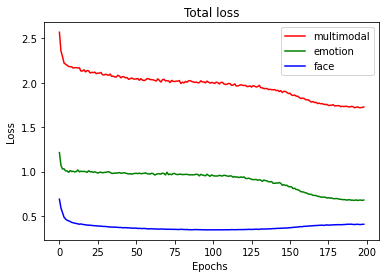

In [8]:
plt.title("Total loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")
plt.plot(training_losses['multimodal_loss'].total_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].total_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].total_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

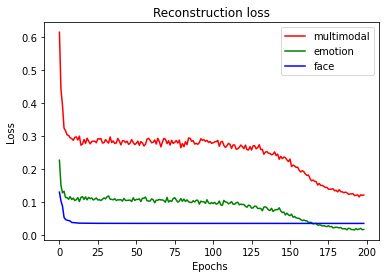

In [9]:
plt.title("Reconstruction loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")

plt.plot(training_losses['multimodal_loss'].reconstruction_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].reconstruction_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].reconstruction_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

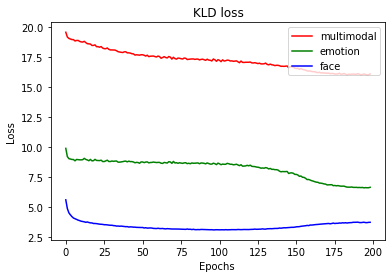

In [10]:
plt.title("KLD loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")

plt.plot(training_losses['multimodal_loss'].kld_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].kld_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].kld_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

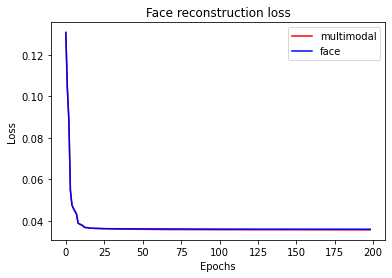

In [11]:
plt.title("Face reconstruction loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.plot(training_losses['multimodal_loss'].faces_reconstruction_loss[skip_epoch_plot:], color='red', label='multimodal')
#plt.plot(training_losses['emotion_loss'].faces_reconstruction_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].faces_reconstruction_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

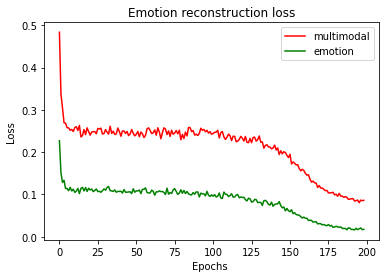

In [12]:
plt.title("Emotion reconstruction loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")

plt.plot(training_losses['multimodal_loss'].emotions_reconstruction_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].emotions_reconstruction_loss[skip_epoch_plot:], color='green', label='emotion')
#plt.plot(training_losses['face_loss'].emotions_reconstruction_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

In [13]:
def testBatch(model, dataset_loader, img_size=64, use_cuda=True):
    sample = next(iter(dataset_loader))
    images = sample['image']
    labels = sample['cat']
    
    if use_cuda:
        images = images.cuda()
        labels = labels.cuda()
        
    input_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
    reconstructed_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
    reconstructed_emotions = []
    
    plt.figure(figsize = (40,10))
    
    batch_size = images.shape[0]
    
    reconstructed_images, reconstructed_emotions, _, _ = model(faces=images, emotions=labels)

    for idx in range(4):
        input_image = images[idx]
        
        # storing the input image
        input_image_display = np.array(input_image.cpu()*255., dtype='uint8').transpose((1, 2, 0))
        input_array = np.concatenate((input_array, input_image_display), axis=1)
        
        # generating the reconstructed image and adding to array
        input_image = input_image.view(1, 3, img_size, img_size)
        
        reconstructed_img = reconstructed_images[idx].cpu().view(3, img_size, img_size).detach().numpy()
        reconstructed_img = np.array(reconstructed_img*255., dtype='uint8').transpose((1, 2, 0))
        reconstructed_array = np.concatenate((reconstructed_array, reconstructed_img), axis=1)
        
    # remove first, blank column, and concatenate
    input_array = input_array[:,1:,:]
    reconstructed_array = reconstructed_array[:,1:,:]
    display_array = np.concatenate((input_array, reconstructed_array), axis=0)
    plt.imshow(display_array)
    
    print([Rd.emocat[label.item()] for label in labels[:4]])
    print([Rd.emocat[emo.item()] for emo in torch.argmax(reconstructed_emotions, 1)[:4]])

['happy', 'sad', 'happy', 'angry']
['happy', 'sad', 'happy', 'angry']


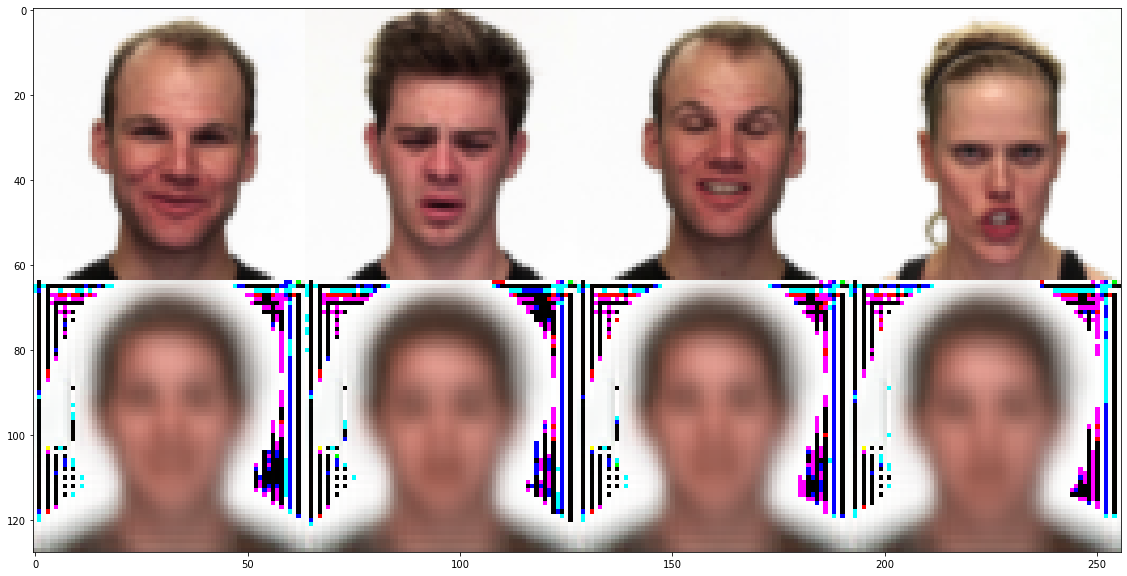

In [14]:
testBatch(model, testset_loader)

In [15]:
from tqdm import tqdm
def emotion_accuracy(model, dataset_loader):
    
    match = 0
    total = 0
    
    for sample in tqdm(iter(dataset_loader)):
        labels = sample['cat'].cuda()
                            
        _, reconstructed_emotions, _, _ = model(faces=None, emotions=labels)  
        emotion_cat = torch.argmax(reconstructed_emotions, 1)  
        
        for idx in range(len(labels)):
            total += 1
            if labels[idx] == emotion_cat[idx]:
                match += 1
    
    acc = match / total
    return acc

In [16]:
print(emotion_accuracy(model, testset_loader))

100%|████████████████████████████| 12/12 [00:05<00:00,  2.01it/s]

0.9916666666666667


In [17]:
save_model = False

if save_model:
    # Do a global and a local save of the model (local to Hydra outputs)
    torch.save(mvae_model.state_dict(), cfg.model_save_path)
    torch.save(mvae_model.state_dict(), "ravdess_mvae_pretrained.pt")
    logger.info(f"Saved model to '{cfg.train.plain.model_save_path}', and also locally.")

    # Do a global and local save of the training stats (local to Hydra outputs)
    torch.save(training_losses, cfg.stats_save_path)
    torch.save(training_losses, "ravdess_mvae_pretrained_stats.pt")
    logger.info(f"Saved model to '{cfg.train.plain.stats_save_path}', and also locally.")